<a href="https://www.kaggle.com/code/kunchamanjula/ipl-2023-eda-project4?scriptVersionId=171726990" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Hello all :) thank you for visting my notebook if you find this project is useful do an upvote and share it to your coding friends thankyou all:)

# Indian Premier League 2023  EDA and Visuvalization

# Import libraries

In [1]:
import math #for mathematical operations
import numpy as np  #for numeric operations
import pandas as pd #to analyse,clean,filter,manipulate ,explore datasets
import matplotlib.pyplot as plt #Data visuvalization and analysis
%matplotlib inline
import seaborn as sns #for advance visuvalizations with matplotlib
from IPython.display import Image  #importing libary to display the image
import os #import operating system to direct the folders
import datetime # datetime is useful to date_time series analysis


# ignore warnings:

In [2]:
import warnings  #import to avoid warnings while run
warnings.simplefilter(action="ignore",category=FutureWarning)

# About Dataset:

The 2023 Indian Premier League (also known as Tata IPL 2023 for sponsorship reasons and sometimes referred to as IPL 2023 or IPL 16) was the 16th season of the Indian Premier League, a franchise Twenty20 cricket league in India. It is organised by the Board of Control for Cricket in India.

# IPL 2023 DATASET:
**This dataset contains two csv datafiles**
1. each_ball_records.csv
2. each_match_records.csv
# each_ball_records.csv:
This dataset contains 17863 rows  and 9 columns
* match_no: match numnber
* ballnumber:ball number
* inningns: innings of the batter
* over:over details
* outcome: outcome during the over
* batter: batters name 
* bowler : bowlers name
* comment: comment on the result they got for praticular ball in match
* score : score of batter in match
# each_match_records.csv:
This dataset contains 74 rows  and 18 columns
* season :ipl year
* date: date of the match
* match_number: no.of that praticular match 
* match_type: type of the match  
* venue: staudium name
* location : stadium loaction 
* team1: team name
* team2: team against the team 1
* toss_won : name of the team which won toss
* toss_decision: decision of toss either batting or bowling by winning team
* umpire1:name of umpire1 
* umpire2 : name of umpire 2
* reserve_umpire :name of reserve umpire who manages the team and field management
* match_referee: refree name
* winner: name of the team which won 
* winner_runs :name of the team which loss 
* winner_wickets: how many wickets has been given by winner team  
* man_of_match: name of the player who got man of match



# Goal of project:
**Importance of data analysis in IPL:**
* To analyze player performance and develop strategies to enhance it
* use for  Player Valuation and Auctions
* Data analytics isn’t limited to team selection alone. It extends to optimizing both team and individual performance.

# Loading Dataset
(#by using pandas)


In [3]:
ipl_ball=pd.read_csv("/kaggle/input/ipl2023/each_ball_records.csv") #loading dataset using pandas
ipl_ball

,match_no,ballnumber,inningno,over,outcome,batter,bowler,comment,score
0,1,1,1,0.1,0,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, no run,",0
1,1,2,1,0.2,1lb,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, 1 leg bye,",1
2,1,3,1,0.3,0,Ruturaj Gaikwad,Mohammed Shami,"Mohammed Shami to Ruturaj Gaikwad, no run,",0
3,1,4,1,0.4,1,Ruturaj Gaikwad,Mohammed Shami,"Mohammed Shami to Ruturaj Gaikwad, 1 run,",1
4,1,5,1,0.5,0,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, no run,",0
...,...,...,...,...,...,...,...,...,...
17858,74,95,2,0.1,0,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, no run,",0
17859,74,96,2,0.2,0,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, no run,",0
17860,74,97,2,0.3,1,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, 1 run,",1
17861,74,98,2,0.4,1,Shubman Gill,Deepak Chahar,"Deepak Chahar to Shubman Gill, 1 run,",1


In [4]:
ipl_match=pd.read_csv("/kaggle/input/ipl2023/each_match_records.csv") #loading dataset using pandas
ipl_match

,season,date,match_number,match_type,venue,location,team1,team2,toss_won,toss_decision,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,man_of_match
0,2023,31-03-2023,1,Group,Narendra Modi Stadium,Ahmedabad,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,Nitin Menon,HAS Khalid,A Bengeri,J Srinath,Gujarat Titans,NaN,5.0,Rashid Khan
1,2023,01-04-2023,2,Group,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,BNJ Oxenford,YC Barde,PM Joshi,M Nayyar,Punjab Kings,7.0,NaN,Arshdeep Singh
2,2023,01-04-2023,3,Group,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Lucknow Super Giants,Delhi Capitals,Delhi Capitals,field,AK Chaudhary,NA Patwardhan,M Kuppuraj,DS Manohar,Lucknow Super Giants,50.0,NaN,MA Wood
3,2023,02-04-2023,4,Group,Rajiv Gandhi International Stadium,Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,KN Ananthapadmanabhan,R Pandit,Abhijit Bhattacharya,V Narayan Kutty,Rajasthan Royals,72.0,NaN,JC Buttler
4,2023,02-04-2023,5,Group,M Chinnaswamy Stadium,Bengaluru,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Nitin Menon,Tapan Sharma,A Bengeri,J Srinath,Royal Challengers Bangalore,NaN,8.0,F du Plessis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2023,21-05-2023,70,Group,M Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,Gujarat Titans,Gujarat Titans,field,Nitin Menon,VK Sharma,VM Dhokre,J Srinath,Gujarat Titans,NaN,6.0,Shubman Gill
70,2023,23-05-2023,71,Qualifier,MA Chidambaram Stadium,Chennai,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,AK Chaudhary,CB Gaffaney,VK Sharma,M Nayyar,Chennai Super Kings,15.0,NaN,RD Gaikwad
71,2023,24-05-2023,72,Eliminator,MA Chidambaram Stadium,Chennai,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,BNJ Oxenford,VK Sharma,AK Chaudhary,V Narayan Kutty,Mumbai Indians,81.0,NaN,Akash Madhwal
72,2023,26-05-2023,73,Qualifier,Narendra Modi Stadium,Ahmedabad,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,Nitin Menon,RJ Tucker,KN Ananthapadmanabhan,J Srinath,Gujarat Titans,62.0,NaN,Shubman Gill


In [5]:
ball=pd.DataFrame(ipl_ball) #converting the datset to dataframes by using pandas
ball

,match_no,ballnumber,inningno,over,outcome,batter,bowler,comment,score
0,1,1,1,0.1,0,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, no run,",0
1,1,2,1,0.2,1lb,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, 1 leg bye,",1
2,1,3,1,0.3,0,Ruturaj Gaikwad,Mohammed Shami,"Mohammed Shami to Ruturaj Gaikwad, no run,",0
3,1,4,1,0.4,1,Ruturaj Gaikwad,Mohammed Shami,"Mohammed Shami to Ruturaj Gaikwad, 1 run,",1
4,1,5,1,0.5,0,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, no run,",0
...,...,...,...,...,...,...,...,...,...
17858,74,95,2,0.1,0,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, no run,",0
17859,74,96,2,0.2,0,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, no run,",0
17860,74,97,2,0.3,1,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, 1 run,",1
17861,74,98,2,0.4,1,Shubman Gill,Deepak Chahar,"Deepak Chahar to Shubman Gill, 1 run,",1


In [6]:
match=pd.DataFrame(ipl_match) #converting the datset to dataframes by using pandas
match

,season,date,match_number,match_type,venue,location,team1,team2,toss_won,toss_decision,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,man_of_match
0,2023,31-03-2023,1,Group,Narendra Modi Stadium,Ahmedabad,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,Nitin Menon,HAS Khalid,A Bengeri,J Srinath,Gujarat Titans,NaN,5.0,Rashid Khan
1,2023,01-04-2023,2,Group,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,BNJ Oxenford,YC Barde,PM Joshi,M Nayyar,Punjab Kings,7.0,NaN,Arshdeep Singh
2,2023,01-04-2023,3,Group,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Lucknow Super Giants,Delhi Capitals,Delhi Capitals,field,AK Chaudhary,NA Patwardhan,M Kuppuraj,DS Manohar,Lucknow Super Giants,50.0,NaN,MA Wood
3,2023,02-04-2023,4,Group,Rajiv Gandhi International Stadium,Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,KN Ananthapadmanabhan,R Pandit,Abhijit Bhattacharya,V Narayan Kutty,Rajasthan Royals,72.0,NaN,JC Buttler
4,2023,02-04-2023,5,Group,M Chinnaswamy Stadium,Bengaluru,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Nitin Menon,Tapan Sharma,A Bengeri,J Srinath,Royal Challengers Bangalore,NaN,8.0,F du Plessis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2023,21-05-2023,70,Group,M Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,Gujarat Titans,Gujarat Titans,field,Nitin Menon,VK Sharma,VM Dhokre,J Srinath,Gujarat Titans,NaN,6.0,Shubman Gill
70,2023,23-05-2023,71,Qualifier,MA Chidambaram Stadium,Chennai,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,AK Chaudhary,CB Gaffaney,VK Sharma,M Nayyar,Chennai Super Kings,15.0,NaN,RD Gaikwad
71,2023,24-05-2023,72,Eliminator,MA Chidambaram Stadium,Chennai,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,BNJ Oxenford,VK Sharma,AK Chaudhary,V Narayan Kutty,Mumbai Indians,81.0,NaN,Akash Madhwal
72,2023,26-05-2023,73,Qualifier,Narendra Modi Stadium,Ahmedabad,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,Nitin Menon,RJ Tucker,KN Ananthapadmanabhan,J Srinath,Gujarat Titans,62.0,NaN,Shubman Gill



# Data Prepartion
*explorings rows and columns*

In [7]:
ball.head() #top5 columns of dataset

,match_no,ballnumber,inningno,over,outcome,batter,bowler,comment,score
0,1,1,1,0.1,0,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, no run,",0
1,1,2,1,0.2,1lb,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, 1 leg bye,",1
2,1,3,1,0.3,0,Ruturaj Gaikwad,Mohammed Shami,"Mohammed Shami to Ruturaj Gaikwad, no run,",0
3,1,4,1,0.4,1,Ruturaj Gaikwad,Mohammed Shami,"Mohammed Shami to Ruturaj Gaikwad, 1 run,",1
4,1,5,1,0.5,0,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, no run,",0


In [8]:
match.head() #top5 columns of dataset

,season,date,match_number,match_type,venue,location,team1,team2,toss_won,toss_decision,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,man_of_match
0,2023,31-03-2023,1,Group,Narendra Modi Stadium,Ahmedabad,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,Nitin Menon,HAS Khalid,A Bengeri,J Srinath,Gujarat Titans,NaN,5.0,Rashid Khan
1,2023,01-04-2023,2,Group,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,BNJ Oxenford,YC Barde,PM Joshi,M Nayyar,Punjab Kings,7.0,NaN,Arshdeep Singh
2,2023,01-04-2023,3,Group,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Lucknow Super Giants,Delhi Capitals,Delhi Capitals,field,AK Chaudhary,NA Patwardhan,M Kuppuraj,DS Manohar,Lucknow Super Giants,50.0,NaN,MA Wood
3,2023,02-04-2023,4,Group,Rajiv Gandhi International Stadium,Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,KN Ananthapadmanabhan,R Pandit,Abhijit Bhattacharya,V Narayan Kutty,Rajasthan Royals,72.0,NaN,JC Buttler
4,2023,02-04-2023,5,Group,M Chinnaswamy Stadium,Bengaluru,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Nitin Menon,Tapan Sharma,A Bengeri,J Srinath,Royal Challengers Bangalore,NaN,8.0,F du Plessis


In [9]:
ball.tail(5) #bottom 5  columns of dataset

,match_no,ballnumber,inningno,over,outcome,batter,bowler,comment,score
17858,74,95,2,0.1,0,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, no run,",0
17859,74,96,2,0.2,0,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, no run,",0
17860,74,97,2,0.3,1,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, 1 run,",1
17861,74,98,2,0.4,1,Shubman Gill,Deepak Chahar,"Deepak Chahar to Shubman Gill, 1 run,",1
17862,74,99,2,0.5,1,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, 1 run,",1


In [10]:
match.tail(5) #bottom 5  columns of dataset

,season,date,match_number,match_type,venue,location,team1,team2,toss_won,toss_decision,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,man_of_match
69,2023,21-05-2023,70,Group,M Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,Gujarat Titans,Gujarat Titans,field,Nitin Menon,VK Sharma,VM Dhokre,J Srinath,Gujarat Titans,NaN,6.0,Shubman Gill
70,2023,23-05-2023,71,Qualifier,MA Chidambaram Stadium,Chennai,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,AK Chaudhary,CB Gaffaney,VK Sharma,M Nayyar,Chennai Super Kings,15.0,NaN,RD Gaikwad
71,2023,24-05-2023,72,Eliminator,MA Chidambaram Stadium,Chennai,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,BNJ Oxenford,VK Sharma,AK Chaudhary,V Narayan Kutty,Mumbai Indians,81.0,NaN,Akash Madhwal
72,2023,26-05-2023,73,Qualifier,Narendra Modi Stadium,Ahmedabad,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,Nitin Menon,RJ Tucker,KN Ananthapadmanabhan,J Srinath,Gujarat Titans,62.0,NaN,Shubman Gill
73,2023,29-05-2023,74,Final,Narendra Modi Stadium,Ahmedabad,Chennai Super Kings,Gujarat Titans,Chennai Super Kings,field,Nitin Menon,RJ Tucker,J Madanagopal,J Srinath,Chennai Super Kings,NaN,5.0,DP Conway


In [11]:
ball.describe()  #gives the summary about the dataset in detailed form

,match_no,ballnumber,inningno,over,score
count,17863.000000,17863.000000,17863.000000,17863.000000,17863.000000
mean,37.339641,61.620277,1.482898,9.669339,1.437832
std,21.374172,35.605743,0.499721,5.711899,1.712919
min,1.000000,1.000000,1.000000,0.100000,0.000000
25%,19.000000,31.000000,1.000000,4.600000,0.000000
50%,37.000000,61.000000,1.000000,9.500000,1.000000
75%,56.000000,92.000000,2.000000,14.500000,2.000000
max,74.000000,136.000000,2.000000,19.600000,7.000000


In [12]:
match.describe()  #gives the summary about the dataset in detailed form

,season,match_number,winner_runs,winner_wickets
count,74.0,74.000000,40.000000,33.000000
mean,2023.0,37.500000,30.400000,5.727273
std,0.0,21.505813,27.554887,1.908414
min,2023.0,1.000000,1.000000,1.000000
25%,2023.0,19.250000,7.750000,5.000000
50%,2023.0,37.500000,22.000000,6.000000
75%,2023.0,55.750000,51.250000,7.000000
max,2023.0,74.000000,112.000000,9.000000


In [13]:
ball.info()#gives the information like datatypes and null count for every columns and rows in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17863 entries, 0 to 17862
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   match_no    17863 non-null  int64  
 1   ballnumber  17863 non-null  int64  
 2   inningno    17863 non-null  int64  
 3   over        17863 non-null  float64
 4   outcome     17863 non-null  object 
 5   batter      17863 non-null  object 
 6   bowler      17863 non-null  object 
 7   comment     17863 non-null  object 
 8   score       17863 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 1.2+ MB


In [14]:
match.info()#gives the information like datatypes and null count for every columns and rows in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          74 non-null     int64  
 1   date            74 non-null     object 
 2   match_number    74 non-null     int64  
 3   match_type      74 non-null     object 
 4   venue           74 non-null     object 
 5   location        74 non-null     object 
 6   team1           74 non-null     object 
 7   team2           74 non-null     object 
 8   toss_won        74 non-null     object 
 9   toss_decision   74 non-null     object 
 10  umpire1         74 non-null     object 
 11  umpire2         74 non-null     object 
 12  reserve_umpire  74 non-null     object 
 13  match_referee   74 non-null     object 
 14  winner          74 non-null     object 
 15  winner_runs     40 non-null     float64
 16  winner_wickets  33 non-null     float64
 17  man_of_match    73 non-null     objec

In [15]:
type(ball) #dataset type is  dataframe as it is the combination of  mutlple series 

pandas.core.frame.DataFrame

In [16]:
type(match["team2"])  #single column in dataset will be consider as series

pandas.core.series.Series

In [17]:
ball.index  #index of dataframe from starting to end range will be shown

RangeIndex(start=0, stop=17863, step=1)

In [18]:
match.index  #index of dataframe from starting to end range will be shown

RangeIndex(start=0, stop=74, step=1)

In [19]:
ball.columns  #columns of the dataframe will be appear

Index(['match_no', 'ballnumber', 'inningno', 'over', 'outcome', 'batter',
       'bowler', 'comment', 'score'],
      dtype='object')

In [20]:
match.columns  #columns of the dataframe will be appear

Index(['season', 'date', 'match_number', 'match_type', 'venue', 'location',
       'team1', 'team2', 'toss_won', 'toss_decision', 'umpire1', 'umpire2',
       'reserve_umpire', 'match_referee', 'winner', 'winner_runs',
       'winner_wickets', 'man_of_match'],
      dtype='object')

In [21]:
ball.values #values in dataframe will appear

array([[1, 1, 1, ..., 'Mohammed Shami',
        'Mohammed Shami to Devon Conway, no run,', 0],
       [1, 2, 1, ..., 'Mohammed Shami',
        'Mohammed Shami to Devon Conway, 1 leg bye,', 1],
       [1, 3, 1, ..., 'Mohammed Shami',
        'Mohammed Shami to Ruturaj Gaikwad, no run,', 0],
       ...,
       [74, 97, 2, ..., 'Deepak Chahar',
        'Deepak Chahar to Wriddhiman Saha, 1 run,', 1],
       [74, 98, 2, ..., 'Deepak Chahar',
        'Deepak Chahar to Shubman Gill, 1 run,', 1],
       [74, 99, 2, ..., 'Deepak Chahar',
        'Deepak Chahar to Wriddhiman Saha, 1 run,', 1]], dtype=object)

In [22]:
match.values #values in dataframe will appear

array([[2023, '31-03-2023', 1, ..., nan, 5.0, 'Rashid Khan'],
       [2023, '01-04-2023', 2, ..., 7.0, nan, 'Arshdeep Singh'],
       [2023, '01-04-2023', 3, ..., 50.0, nan, 'MA Wood'],
       ...,
       [2023, '24-05-2023', 72, ..., 81.0, nan, 'Akash Madhwal'],
       [2023, '26-05-2023', 73, ..., 62.0, nan, 'Shubman Gill'],
       [2023, '29-05-2023', 74, ..., nan, 5.0, 'DP Conway']], dtype=object)

In [23]:
match.set_index('date',inplace=True)#for setting customized index

In [24]:
match.head()

,season,match_number,match_type,venue,location,team1,team2,toss_won,toss_decision,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,man_of_match
date,,,,,,,,,,,,,,,,,
31-03-2023,2023,1,Group,Narendra Modi Stadium,Ahmedabad,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,Nitin Menon,HAS Khalid,A Bengeri,J Srinath,Gujarat Titans,NaN,5.0,Rashid Khan
01-04-2023,2023,2,Group,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,BNJ Oxenford,YC Barde,PM Joshi,M Nayyar,Punjab Kings,7.0,NaN,Arshdeep Singh
01-04-2023,2023,3,Group,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Lucknow Super Giants,Delhi Capitals,Delhi Capitals,field,AK Chaudhary,NA Patwardhan,M Kuppuraj,DS Manohar,Lucknow Super Giants,50.0,NaN,MA Wood
02-04-2023,2023,4,Group,Rajiv Gandhi International Stadium,Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,KN Ananthapadmanabhan,R Pandit,Abhijit Bhattacharya,V Narayan Kutty,Rajasthan Royals,72.0,NaN,JC Buttler
02-04-2023,2023,5,Group,M Chinnaswamy Stadium,Bengaluru,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Nitin Menon,Tapan Sharma,A Bengeri,J Srinath,Royal Challengers Bangalore,NaN,8.0,F du Plessis


In [25]:
match.reset_index(inplace=True)#for getting back to original dataset

In [26]:
match.head()

,date,season,match_number,match_type,venue,location,team1,team2,toss_won,toss_decision,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,man_of_match
0,31-03-2023,2023,1,Group,Narendra Modi Stadium,Ahmedabad,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,Nitin Menon,HAS Khalid,A Bengeri,J Srinath,Gujarat Titans,NaN,5.0,Rashid Khan
1,01-04-2023,2023,2,Group,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,BNJ Oxenford,YC Barde,PM Joshi,M Nayyar,Punjab Kings,7.0,NaN,Arshdeep Singh
2,01-04-2023,2023,3,Group,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Lucknow Super Giants,Delhi Capitals,Delhi Capitals,field,AK Chaudhary,NA Patwardhan,M Kuppuraj,DS Manohar,Lucknow Super Giants,50.0,NaN,MA Wood
3,02-04-2023,2023,4,Group,Rajiv Gandhi International Stadium,Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,KN Ananthapadmanabhan,R Pandit,Abhijit Bhattacharya,V Narayan Kutty,Rajasthan Royals,72.0,NaN,JC Buttler
4,02-04-2023,2023,5,Group,M Chinnaswamy Stadium,Bengaluru,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Nitin Menon,Tapan Sharma,A Bengeri,J Srinath,Royal Challengers Bangalore,NaN,8.0,F du Plessis


# Data cleaning
*Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

# benfitis of data cleaning

* Error free data
* Acurracy and effiency
* Data quality
* Data consistency

In [27]:
mask=ball.isnull()  #isnullfunctions checks for null in dataset and gives boolean output 
ball[mask]     #mask is variable which stores True values
# in this dataset doesnt have any null values so it showing NaN

,match_no,ballnumber,inningno,over,outcome,batter,bowler,comment,score
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
17858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
print(ball.isnull().sum()) #no null values in any columns

match_no      0
ballnumber    0
inningno      0
over          0
outcome       0
batter        0
bowler        0
comment       0
score         0
dtype: int64


* NOTE : [if nulls are present in dataset then treat them with fillna() or dropna()]

In [29]:
ball.duplicated(subset=['match_no', 'ballnumber', 'inningno', 'over', 'outcome', 'batter',
       'bowler', 'comment', 'score'])
#checks for duplicates in this dataset

0        False
1        False
2        False
3        False
4        False
         ...  
17858    False
17859    False
17860    False
17861    False
17862    False
Length: 17863, dtype: bool

In [30]:
mask=match.isnull()  #isnullfunctions checks for null in dataset and gives boolean output 
match[mask]     #mask is variable which stores True values
# in this dataset doesnt have any null values so it showing NaN

,date,season,match_number,match_type,venue,location,team1,team2,toss_won,toss_decision,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,man_of_match
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
print(match.isnull().sum()) #null values in some  columns

date               0
season             0
match_number       0
match_type         0
venue              0
location           0
team1              0
team2              0
toss_won           0
toss_decision      0
umpire1            0
umpire2            0
reserve_umpire     0
match_referee      0
winner             0
winner_runs       34
winner_wickets    41
man_of_match       1
dtype: int64


In [32]:
match.dropna(inplace=True) #dropping null values in dataset

In [33]:
print(match.isnull().sum()) # no null values in any  columns

date              0
season            0
match_number      0
match_type        0
venue             0
location          0
team1             0
team2             0
toss_won          0
toss_decision     0
umpire1           0
umpire2           0
reserve_umpire    0
match_referee     0
winner            0
winner_runs       0
winner_wickets    0
man_of_match      0
dtype: int64


In [34]:
 ipl_match.duplicated(subset=['season', 'date', 'match_number', 'match_type', 'venue', 'location','team1', 'team2', 'toss_won', 'toss_decision', 'umpire1', 'umpire2','reserve_umpire', 'match_referee', 'winner', 'winner_runs','winner_wickets', 'man_of_match'])
#checks for duplicates in this dataset

0     False
1     False
2     False
3     False
4     False
      ...  
69    False
70    False
71    False
72    False
73    False
Length: 74, dtype: bool

In [35]:
# if there is duplicates treat it with drop_dupliacates for error free dataset
#checks for duplicates in this dataset
ball.drop_duplicates(subset=['match_no', 'ballnumber', 'inningno', 'over', 'outcome', 'batter',
       'bowler', 'comment', 'score'],inplace=True)
len(ball)   #the length before drop duplicates and after is same therefore there are no dupliacates in dataset
#if length and drop duplicates changes then there are duplicates

17863

In [36]:
# if there is duplicates treat it with drop_dupliacates for error free dataset
#checks for duplicates in this dataset
ipl_match.drop_duplicates(subset=['season', 'date', 'match_number', 'match_type', 'venue', 'location','team1', 'team2', 'toss_won', 'toss_decision', 'umpire1', 'umpire2','reserve_umpire', 'match_referee', 'winner', 'winner_runs','winner_wickets', 'man_of_match'])
#checks for duplicates in this dataset],inplace=True)
len(ipl_match)   #the length before drop duplicates and after is same therefore there are no dupliacates in dataset
#if length and drop duplicates changes then there are duplicates

74

In [37]:
ball.nunique()  #give the count of unique numbers in dataset by columns vise

match_no        74
ballnumber     136
inningno         2
over           120
outcome         23
batter         182
bowler         136
comment       9605
score            8
dtype: int64

In [38]:
ball["outcome"].unique()  #give the unique  array in dataset  with respect to column given

array(['0', '1lb', '1', '4', 'w', '6', '1nb', '4lb', '2', '1b', '1wd',
       '2nb', '5nb', '7nb', '3', '5wd', '4b', '2wd', '5', '3wd', '2lb',
       '3nb', '2b'], dtype=object)

In [39]:
ipl_match.nunique()  #give the count of unique numbers in dataset by columns vise

season             1
date              56
match_number      74
match_type         4
venue             12
location          12
team1             10
team2             10
toss_won          10
toss_decision      2
umpire1           15
umpire2           17
reserve_umpire    12
match_referee     13
winner            11
winner_runs       29
winner_wickets     9
man_of_match      51
dtype: int64

In [40]:
ipl_match["location"].unique()  #give the unique  array in dataset  with respect to column given ipl_match[""].unique()

array(['Ahmedabad', 'Chandigarh', 'Lucknow', 'Hyderabad', 'Bengaluru',
       'Chennai', 'Delhi', 'Guwahati', 'Kolkata', 'Mumbai', 'Jaipur',
       'Dharamsala'], dtype=object)

In [41]:
ipl_match['winner_wickets'].unique()  #give the unique  array in dataset  with respect to column given

array([ 5., nan,  8.,  6.,  7.,  3.,  1.,  2.,  4.,  9.])

In [42]:
ball['score'].unique()  #give the unique  array in dataset  with respect to column given

array([0, 1, 4, 6, 2, 5, 7, 3])

In [43]:
ipl_ball=ipl_ball.drop("comment",axis=1) #dropping unwanted columns from data

In [44]:
ipl_match["team1"]=ipl_match["team1"].str.strip() #using strip to remove spaces between words in dataset

In [45]:
ipl_match["team1"].nunique()

10

In [46]:
ipl_match["team2"]=ipl_match["team2"].str.strip()#using strip to remove spaces between words in dataset

In [47]:
ipl_ball["bowler"]=ipl_ball["bowler"].str.strip()#using strip to remove spaces between words in dataset

In [48]:
ipl_match["team2"].nunique()

10

# optimising data 
* reducing memomry using small changes in datatypes

In [49]:
ipl_match['winner_wickets']=ipl_match['winner_wickets'].fillna(0).astype('int') #converting decimals to int for reducing memory

In [50]:
ipl_match['winner_runs']=ipl_match['winner_runs'].fillna(0).astype('int') #converting decimals to int for reducing memory

In [51]:
ipl_match.info()#getting info after optimization

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   season          74 non-null     int64 
 1   date            74 non-null     object
 2   match_number    74 non-null     int64 
 3   match_type      74 non-null     object
 4   venue           74 non-null     object
 5   location        74 non-null     object
 6   team1           74 non-null     object
 7   team2           74 non-null     object
 8   toss_won        74 non-null     object
 9   toss_decision   74 non-null     object
 10  umpire1         74 non-null     object
 11  umpire2         74 non-null     object
 12  reserve_umpire  74 non-null     object
 13  match_referee   74 non-null     object
 14  winner          74 non-null     object
 15  winner_runs     74 non-null     int64 
 16  winner_wickets  74 non-null     int64 
 17  man_of_match    73 non-null     object
dtypes: int64(4),

In [52]:
ball['over']=ball['over'].fillna(0).astype('int') #converting decimals to int for reducing memory

In [53]:
ball.info() #getting info after optimization

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17863 entries, 0 to 17862
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   match_no    17863 non-null  int64 
 1   ballnumber  17863 non-null  int64 
 2   inningno    17863 non-null  int64 
 3   over        17863 non-null  int64 
 4   outcome     17863 non-null  object
 5   batter      17863 non-null  object
 6   bowler      17863 non-null  object
 7   comment     17863 non-null  object
 8   score       17863 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


 # Data performing:
the process of systematically applying the statstical,numerical and logic techinques to describe and illustrate and evaluate data

In [54]:
ball.shape

(17863, 9)

In [55]:
ball.ndim

2

In [56]:
ball.size

160767

In [57]:
ipl_match.size

1332

#  Exploratory Data  Analysis & Visualization
* EDA plays an important role in Data Analysis
* Explanatory data analytics focuses on all the parts of context, mainly the why and how. An outcome can be statistically calculated, modeled, or visualized to tell you the likelihood of certain events based on preconceived variables.

In [58]:
ipl_ball["score"].max() #gives maxiumum value in dataset

7

In [59]:
ipl_match["winner_runs"].min() #gives minimum winner_wickets value in dataset

0

In [60]:
ipl_ball["over"].mean() #gives mean  value in dataset


9.669338856854951

In [61]:
ipl_match["match_number"].median() #gives median value in dataset

37.5

In [62]:
ipl_match["season"].mode()

0    2023
Name: season, dtype: int64

In [63]:
ball.sort_values("score")  #ascending sorting based on score column in a dataset (numerical sorting)

,match_no,ballnumber,inningno,over,outcome,batter,bowler,comment,score
0,1,1,1,0,0,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, no run,",0
8736,36,54,2,8,0,Virat Kohli,Nitish Rana,"Nitish Rana to Virat Kohli, no run,",0
8721,36,39,2,6,0,Mahipal Lomror,Andre Russell,"Andre Russell to Mahipal Lomror, no run,",0
8719,36,37,2,6,0,Virat Kohli,Andre Russell,"Andre Russell to Virat Kohli, no run,",0
8718,36,36,2,5,0,Mahipal Lomror,Varun Chakravarthy,"Varun Chakravarthy to Mahipal Lomror, no run,",0
...,...,...,...,...,...,...,...,...,...
16594,69,33,2,5,7nb,Cameron Green,Kartik Tyagi,"Kartik Tyagi to Cameron Green, 7 no ball,",7
15427,64,121,2,19,7nb,Liam Livings,Ishant Sharma,"Ishant Sharma to Liam Livingstone, 7 no ball,",7
2061,9,114,1,17,7nb,Rinku Singh,Mohammed Siraj,"Mohammed Siraj to Rinku Singh, 7 no ball,",7
16614,69,53,2,8,7nb,Rohit Sharma,Vivrant Sharma,"Vivrant Sharma to Rohit Sharma, 7 no ball,",7


In [64]:
ipl_match.sort_values("location")#ascending sorting based on location column in a dataset (alphabetical sorting)

,season,date,match_number,match_type,venue,location,team1,team2,toss_won,toss_decision,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,man_of_match
0,2023,31-03-2023,1,Group,Narendra Modi Stadium,Ahmedabad,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,Nitin Menon,HAS Khalid,A Bengeri,J Srinath,Gujarat Titans,0,5,Rashid Khan
61,2023,15-05-2023,62,Group,Narendra Modi Stadium,Ahmedabad,Gujarat Titans,Sunrisers Hyderabad,Sunrisers Hyderabad,field,J Madanagopal,UV Gandhe,Mohamad Rafi,M Nayyar,Gujarat Titans,34,0,Shubman Gill
50,2023,07-05-2023,51,Group,Narendra Modi Stadium,Ahmedabad,Gujarat Titans,Lucknow Super Giants,Lucknow Super Giants,field,AK Chaudhary,A Nand Kishore,M Krishnadas,Prakash Bhatt,Gujarat Titans,56,0,Shubman Gill
43,2023,02-05-2023,44,Group,Narendra Modi Stadium,Ahmedabad,Delhi Capitals,Gujarat Titans,Delhi Capitals,bat,MA Gough,R Pandit,P Joshi,V Narayan Kutty,Delhi Capitals,5,0,Mohammed Shami
72,2023,26-05-2023,73,Qualifier,Narendra Modi Stadium,Ahmedabad,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,Nitin Menon,RJ Tucker,KN Ananthapadmanabhan,J Srinath,Gujarat Titans,62,0,Shubman Gill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2023,21-05-2023,69,Group,Wankhede Stadium,Mumbai,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,KN Ananthapadmanabhan,RJ Tucker,P Joshi,P Dharmani,Mumbai Indians,0,8,C Green
21,2023,16-04-2023,22,Group,Wankhede Stadium,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,BNJ Oxenford,UV Gandhe,PM Joshi,R Seth,Mumbai Indians,0,5,VR Iyer
11,2023,08-04-2023,12,Group,Wankhede Stadium,Mumbai,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,CB Gaffaney,NA Patwardhan,M Kuppuraj,DS Manohar,Chennai Super Kings,0,7,RA Jadeja
56,2023,12-05-2023,57,Group,Wankhede Stadium,Mumbai,Mumbai Indians,Gujarat Titans,Gujarat Titans,field,Nitin Menon,Tapan Sharma,VM Dhokre,RS Sodhi,Mumbai Indians,27,0,SA Yadav


In [65]:
ball.sort_values("bowler",ascending=False)  #descending sorting based on bowler column in a dataset

,match_no,ballnumber,inningno,over,outcome,batter,bowler,comment,score
12475,52,32,2,5,0,Anmolpreet Singh,Yuzvendra Chahal,"Yuzvendra Chahal to Anmolpreet Singh, no run,",0
14355,60,114,1,18,1,Anuj Rawat,Yuzvendra Chahal,"Yuzvendra Chahal to Anuj Rawat, 1 run,",1
7607,32,41,1,6,0,Glenn Maxwell,Yuzvendra Chahal,"Yuzvendra Chahal to Glenn Maxwell, no run,",0
7606,32,40,1,6,6,Glenn Maxwell,Yuzvendra Chahal,"Yuzvendra Chahal to Glenn Maxwell, Six,",6
899,4,62,2,10,1,Mayank Agarwal,Yuzvendra Chahal,"Yuzvendra Chahal to Mayank Agarwal, 1 run,",1
...,...,...,...,...,...,...,...,...,...
13930,58,60,2,9,4,Prerak Mankad,Abhishek Sharma,"Abhishek Sharma to Prerak Mankad, Four,",4
13931,58,61,2,9,0,Prerak Mankad,Abhishek Sharma,"Abhishek Sharma to Prerak Mankad, no run,",0
13938,58,68,2,11,0,Marcus S,Abhishek Sharma,"Abhishek Sharma to Marcus Stoinis, no run,",0
13939,58,69,2,11,2,Marcus S,Abhishek Sharma,"Abhishek Sharma to Marcus Stoinis, 2 runs,",2


In [66]:
ipl_match.sort_values("winner_runs",ascending=False)  #descending sorting based on winner_runs column in a dataset(numerical sorting)

,season,date,match_number,match_type,venue,location,team1,team2,toss_won,toss_decision,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,man_of_match
59,2023,14-05-2023,60,Group,Sawai Mansingh Stadium,Jaipur,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,bat,KN Ananthapadmanabhan,Navdeep Singh,P Joshi,V Narayan Kutty,Royal Challengers Bangalore,112,0,WD Parnell
71,2023,24-05-2023,72,Eliminator,MA Chidambaram Stadium,Chennai,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,BNJ Oxenford,VK Sharma,AK Chaudhary,V Narayan Kutty,Mumbai Indians,81,0,Akash Madhwal
8,2023,06-04-2023,9,Group,Eden Gardens,Kolkata,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Vinod Seshan,VK Sharma,A Bengeri,Shakti Singh,Kolkata Knight Riders,81,0,SN Thakur
66,2023,20-05-2023,67,Group,Arun Jaitley Stadium,Delhi,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,CB Gaffaney,NA Patwardhan,M Krishnadas,Sanjay Verma,Chennai Super Kings,77,0,RD Gaikwad
3,2023,02-04-2023,4,Group,Rajiv Gandhi International Stadium,Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,KN Ananthapadmanabhan,R Pandit,Abhijit Bhattacharya,V Narayan Kutty,Rajasthan Royals,72,0,JC Buttler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,2023,30-04-2023,42,Group,Wankhede Stadium,Mumbai,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,Vinod Seshan,VK Sharma,VM Dhokre,J Srinath,Mumbai Indians,0,6,YBK Jaiswal
44,2023,03-05-2023,45,Group,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,AK Chaudhary,NA Patwardhan,M Krishnadas,Prakash Bhatt,No Result,0,0,NaN
45,2023,03-05-2023,46,Group,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Punjab Kings,Mumbai Indians,Mumbai Indians,field,J Madanagopal,RJ Tucker,Mohamad Rafi,SS Raul,Mumbai Indians,0,6,Ishan Kishan
47,2023,05-05-2023,48,Group,Sawai Mansingh Stadium,Jaipur,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,HAS Khalid,VK Sharma,VM Dhokre,J Srinath,Gujarat Titans,0,9,Rashid Khan


In [67]:
ipl_match.sort_index()  #sorting based on index column in a dataset (back to original dataset)

,season,date,match_number,match_type,venue,location,team1,team2,toss_won,toss_decision,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,man_of_match
0,2023,31-03-2023,1,Group,Narendra Modi Stadium,Ahmedabad,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,Nitin Menon,HAS Khalid,A Bengeri,J Srinath,Gujarat Titans,0,5,Rashid Khan
1,2023,01-04-2023,2,Group,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,BNJ Oxenford,YC Barde,PM Joshi,M Nayyar,Punjab Kings,7,0,Arshdeep Singh
2,2023,01-04-2023,3,Group,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Lucknow Super Giants,Delhi Capitals,Delhi Capitals,field,AK Chaudhary,NA Patwardhan,M Kuppuraj,DS Manohar,Lucknow Super Giants,50,0,MA Wood
3,2023,02-04-2023,4,Group,Rajiv Gandhi International Stadium,Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,KN Ananthapadmanabhan,R Pandit,Abhijit Bhattacharya,V Narayan Kutty,Rajasthan Royals,72,0,JC Buttler
4,2023,02-04-2023,5,Group,M Chinnaswamy Stadium,Bengaluru,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Nitin Menon,Tapan Sharma,A Bengeri,J Srinath,Royal Challengers Bangalore,0,8,F du Plessis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2023,21-05-2023,70,Group,M Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,Gujarat Titans,Gujarat Titans,field,Nitin Menon,VK Sharma,VM Dhokre,J Srinath,Gujarat Titans,0,6,Shubman Gill
70,2023,23-05-2023,71,Qualifier,MA Chidambaram Stadium,Chennai,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,AK Chaudhary,CB Gaffaney,VK Sharma,M Nayyar,Chennai Super Kings,15,0,RD Gaikwad
71,2023,24-05-2023,72,Eliminator,MA Chidambaram Stadium,Chennai,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,BNJ Oxenford,VK Sharma,AK Chaudhary,V Narayan Kutty,Mumbai Indians,81,0,Akash Madhwal
72,2023,26-05-2023,73,Qualifier,Narendra Modi Stadium,Ahmedabad,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,Nitin Menon,RJ Tucker,KN Ananthapadmanabhan,J Srinath,Gujarat Titans,62,0,Shubman Gill


In [68]:
ipl_ball.sort_index()  #sorting based on index column in a dataset (back to original dataset)

,match_no,ballnumber,inningno,over,outcome,batter,bowler,score
0,1,1,1,0.1,0,Devon Conway,Mohammed Shami,0
1,1,2,1,0.2,1lb,Devon Conway,Mohammed Shami,1
2,1,3,1,0.3,0,Ruturaj Gaikwad,Mohammed Shami,0
3,1,4,1,0.4,1,Ruturaj Gaikwad,Mohammed Shami,1
4,1,5,1,0.5,0,Devon Conway,Mohammed Shami,0
...,...,...,...,...,...,...,...,...
17858,74,95,2,0.1,0,Wriddhiman Saha,Deepak Chahar,0
17859,74,96,2,0.2,0,Wriddhiman Saha,Deepak Chahar,0
17860,74,97,2,0.3,1,Wriddhiman Saha,Deepak Chahar,1
17861,74,98,2,0.4,1,Shubman Gill,Deepak Chahar,1


In [69]:
ipl_ball.iloc[28]   #acessing location based on index

match_no                   1
ballnumber                29
inningno                   1
over                     4.4
outcome                    6
batter             Moeen Ali
bowler        Mohammed Shami
score                      6
Name: 28, dtype: object

In [70]:
ipl_match.iloc[20:31:3]  #accesing dataframes with iloc accessor where range is excluive 

,season,date,match_number,match_type,venue,location,team1,team2,toss_won,toss_decision,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,man_of_match
20,2023,15-04-2023,21,Group,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Lucknow Super Giants,Punjab Kings,Punjab Kings,field,HAS Khalid,VK Sharma,A Bengeri,Shakti Singh,Punjab Kings,0,2,Sikandar Raza
23,2023,17-04-2023,24,Group,M Chinnaswamy Stadium,Bengaluru,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,KN Ananthapadmanabhan,Navdeep Singh,Abhijit Bhattacharya,Amit Sharma,Chennai Super Kings,8,0,DP Conway
26,2023,20-04-2023,27,Group,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Royal Challengers Bangalore,Punjab Kings,Punjab Kings,field,AK Chaudhary,GR Sadashiv Iyer,M Kuppuraj,Prakash Bhatt,Royal Challengers Bangalore,24,0,Mohammed Siraj
29,2023,22-04-2023,30,Group,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Gujarat Titans,Lucknow Super Giants,Gujarat Titans,bat,A Totre,RJ Tucker,PM Joshi,R Seth,Gujarat Titans,7,0,MM Sharma


In [71]:
ball.nlargest(3,"ballnumber") #top 3 highest dataframes in dataset

,match_no,ballnumber,inningno,over,outcome,batter,bowler,comment,score
1455,6,136,2,19,6,Mark Wood,Tushar Deshpande,"Tushar Deshpande to Mark Wood, Six,",6
1454,6,135,2,19,4,Mark Wood,Tushar Deshpande,"Tushar Deshpande to Mark Wood, Four,",4
1453,6,134,2,19,0,Mark Wood,Tushar Deshpande,"Tushar Deshpande to Mark Wood, no run,",0


In [72]:
ipl_match.nsmallest(5,"winner_wickets") #bottom 5 smallest likes values in dataset

,season,date,match_number,match_type,venue,location,team1,team2,toss_won,toss_decision,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,man_of_match
1,2023,01-04-2023,2,Group,Punjab Cricket Association IS Bindra Stadium,Chandigarh,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,BNJ Oxenford,YC Barde,PM Joshi,M Nayyar,Punjab Kings,7,0,Arshdeep Singh
2,2023,01-04-2023,3,Group,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Lucknow Super Giants,Delhi Capitals,Delhi Capitals,field,AK Chaudhary,NA Patwardhan,M Kuppuraj,DS Manohar,Lucknow Super Giants,50,0,MA Wood
3,2023,02-04-2023,4,Group,Rajiv Gandhi International Stadium,Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,KN Ananthapadmanabhan,R Pandit,Abhijit Bhattacharya,V Narayan Kutty,Rajasthan Royals,72,0,JC Buttler
5,2023,03-04-2023,6,Group,MA Chidambaram Stadium,Chennai,Chennai Super Kings,Lucknow Super Giants,Lucknow Super Giants,field,A Totre,BNJ Oxenford,PM Joshi,M Nayyar,Chennai Super Kings,12,0,MM Ali
7,2023,05-04-2023,8,Group,Barsapara Cricket Stadium,Guwahati,Punjab Kings,Rajasthan Royals,Rajasthan Royals,field,KN Ananthapadmanabhan,MV Saidharshan Kumar,Abhijit Bhattacharya,V Narayan Kutty,Punjab Kings,5,0,NT Ellis


In [73]:
ball[10:20:2]  #slicing[start:stop:step]

,match_no,ballnumber,inningno,over,outcome,batter,bowler,comment,score
10,1,11,1,1,1,Devon Conway,Hardik Pandya,"Hardik Pandya to Devon Conway, 1 run,",1
12,1,13,1,2,1,Ruturaj Gaikwad,Mohammed Shami,"Mohammed Shami to Ruturaj Gaikwad, 1 run,",1
14,1,15,1,2,0,Moeen Ali,Mohammed Shami,"Mohammed Shami to Moeen Ali, no run,",0
16,1,17,1,2,0,Moeen Ali,Mohammed Shami,"Mohammed Shami to Moeen Ali, no run,",0
18,1,19,1,3,6,Ruturaj Gaikwad,Josh Little,"Josh Little to Ruturaj Gaikwad, Six,",6


In [74]:
ball.set_index(["inningno","batter"],inplace=True)
ball    #multi level indexing where innings acts as parental hireacy index and batter acts as child hireachy level indexing


match_no  ballnumber  over outcome          bowler  \
inningno batter                                                                
1        Devon Conway            1           1     0       0  Mohammed Shami   
         Devon Conway            1           2     0     1lb  Mohammed Shami   
         Ruturaj Gaikwad         1           3     0       0  Mohammed Shami   
         Ruturaj Gaikwad         1           4     0       1  Mohammed Shami   
         Devon Conway            1           5     0       0  Mohammed Shami   
...                            ...         ...   ...     ...             ...   
2        Wriddhiman Saha        74          95     0       0   Deepak Chahar   
         Wriddhiman Saha        74          96     0       0   Deepak Chahar   
         Wriddhiman Saha        74          97     0       1   Deepak Chahar   
         Shubman Gill           74          98     0       1   Deepak Chahar   
         Wriddhiman Saha        74          99     0       1   Deepak Chahar   

                                                             comment  score  
inningno batter                                                              
1        Devon Conway        Mohammed Shami to Devon Conway, no run,      0  
         Devon Conway     Mohammed Shami to Devon Conway, 1 leg bye,      1  
         Ruturaj Gaikwad  Mohammed Shami to Ruturaj Gaikwad, no run,      0  
         Ruturaj Gaikwad   Mohammed Shami to Ruturaj Gaikwad, 1 run,      1  
         Devon Conway        Mohammed Shami to Devon Conway, no run,      0  
...                                                              ...    ...  
2        Wriddhiman Saha   Deepak Chahar to Wriddhiman Saha, no run,      0  
         Wriddhiman Saha   Deepak Chahar to Wriddhiman Saha, no run,      0  
         Wriddhiman Saha    Deepak Chahar to Wriddhiman Saha, 1 run,      1  
         Shubman Gill          Deepak Chahar to Shubman Gill, 1 run,      1  
         Wriddhiman Saha    Deepak Chahar to Wriddhiman Saha, 1 run,      1  

[17863 rows x 7 columns]

In [75]:
ipl_match.set_index(["match_type","venue"],inplace=True)
ipl_match    #multi level indexing where match type acts as parental hireacy index and venue acts as child hireachy level indexing


season  \
match_type venue                                                        
Group      Narendra Modi Stadium                                 2023   
           Punjab Cricket Association IS Bindra Stadium          2023   
           Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cr...    2023   
           Rajiv Gandhi International Stadium                    2023   
           M Chinnaswamy Stadium                                 2023   
...                                                               ...   
           M Chinnaswamy Stadium                                 2023   
Qualifier  MA Chidambaram Stadium                                2023   
Eliminator MA Chidambaram Stadium                                2023   
Qualifier  Narendra Modi Stadium                                 2023   
Final      Narendra Modi Stadium                                 2023   

                                                                     date  \
match_type venue                                                            
Group      Narendra Modi Stadium                               31-03-2023   
           Punjab Cricket Association IS Bindra Stadium        01-04-2023   
           Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cr...  01-04-2023   
           Rajiv Gandhi International Stadium                  02-04-2023   
           M Chinnaswamy Stadium                               02-04-2023   
...                                                                   ...   
           M Chinnaswamy Stadium                               21-05-2023   
Qualifier  MA Chidambaram Stadium                              23-05-2023   
Eliminator MA Chidambaram Stadium                              24-05-2023   
Qualifier  Narendra Modi Stadium                               26-05-2023   
Final      Narendra Modi Stadium                               29-05-2023   

                                                               match_number  \
match_type venue                                                              
Group      Narendra Modi Stadium                                          1   
           Punjab Cricket Association IS Bindra Stadium                   2   
           Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cr...             3   
           Rajiv Gandhi International Stadium                             4   
           M Chinnaswamy Stadium                                          5   
...                                                                     ...   
           M Chinnaswamy Stadium                                         70   
Qualifier  MA Chidambaram Stadium                                        71   
Eliminator MA Chidambaram Stadium                                        72   
Qualifier  Narendra Modi Stadium                                         73   
Final      Narendra Modi Stadium                                         74   

                                                                 location  \
match_type venue                                                            
Group      Narendra Modi Stadium                                Ahmedabad   
           Punjab Cricket Association IS Bindra Stadium        Chandigarh   
           Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cr...     Lucknow   
           Rajiv Gandhi International Stadium                   Hyderabad   
           M Chinnaswamy Stadium                                Bengaluru   
...                                                                   ...   
           M Chinnaswamy Stadium                                Bengaluru   
Qualifier  MA Chidambaram Stadium                                 Chennai   
Eliminator MA Chidambaram Stadium                                 Chennai   
Qualifier  Narendra Modi Stadium                                Ahmedabad   
Final      Narendra Modi Stadium                                Ahmedabad   

                                                                                 

In [76]:
ball.reset_index(inplace=True)

In [77]:
ball.head(3)

,inningno,batter,match_no,ballnumber,over,outcome,bowler,comment,score
0,1,Devon Conway,1,1,0,0,Mohammed Shami,"Mohammed Shami to Devon Conway, no run,",0
1,1,Devon Conway,1,2,0,1lb,Mohammed Shami,"Mohammed Shami to Devon Conway, 1 leg bye,",1
2,1,Ruturaj Gaikwad,1,3,0,0,Mohammed Shami,"Mohammed Shami to Ruturaj Gaikwad, no run,",0


In [78]:
ipl_match.reset_index(inplace=True)

In [79]:
ipl_match.tail(3)

,match_type,venue,season,date,match_number,location,team1,team2,toss_won,toss_decision,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,man_of_match
71,Eliminator,MA Chidambaram Stadium,2023,24-05-2023,72,Chennai,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,BNJ Oxenford,VK Sharma,AK Chaudhary,V Narayan Kutty,Mumbai Indians,81,0,Akash Madhwal
72,Qualifier,Narendra Modi Stadium,2023,26-05-2023,73,Ahmedabad,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,Nitin Menon,RJ Tucker,KN Ananthapadmanabhan,J Srinath,Gujarat Titans,62,0,Shubman Gill
73,Final,Narendra Modi Stadium,2023,29-05-2023,74,Ahmedabad,Chennai Super Kings,Gujarat Titans,Chennai Super Kings,field,Nitin Menon,RJ Tucker,J Madanagopal,J Srinath,Chennai Super Kings,0,5,DP Conway


# Data visuvalization

# Question and Answers
* by using different libararies to perform EDA and VISUALIZATION

# 1.show the scoreboard of batsmen with minumum and maximum score got by batsmen?

In [80]:
ball.groupby('batter').score.agg([len, min, max]).sort_values(by='len', ascending=False).head(10) # using groupby method for differnating the maximum and minimum 

,len,min,max
batter,,,
Shubman Gill,580,0,6
Devon Conway,481,0,6
Faf du Plessis,475,0,6
Virat Kohli,469,0,6
Ruturaj Gaikwad,408,0,6
David Warner,401,0,6
Yashasvi Jaiswal,384,0,7
Suryakumar Yadav,334,0,7
Rinku Singh,331,0,7


# 2.how many no.of wickets_runs got by each team  in match?

In [81]:
ipl_match.groupby(['team1']).winner_runs.agg([len, min, max]).sort_values(by='len', ascending=False)# using groupby method for differnating the maximum and minimum 

,len,min,max
team1,,,
Chennai Super Kings,10,0,77
Punjab Kings,9,0,31
Royal Challengers Bangalore,9,0,112
Gujarat Titans,7,0,62
Kolkata Knight Riders,7,0,81
Lucknow Super Giants,7,0,56
Rajasthan Royals,7,0,72
Sunrisers Hyderabad,7,0,23
Mumbai Indians,6,0,81


In [82]:
ipl_match.groupby(['team2']).winner_runs.agg([len, min, max]).sort_values(by='len', ascending=False)# using groupby method for differnating the maximum and minimum 

,len,min,max
team2,,,
Gujarat Titans,10,0,27
Mumbai Indians,10,0,62
Delhi Capitals,9,0,77
Lucknow Super Giants,8,0,81
Kolkata Knight Riders,7,0,49
Rajasthan Royals,7,0,112
Sunrisers Hyderabad,7,0,72
Chennai Super Kings,6,0,32
Punjab Kings,5,0,56


# 3. plot the bar chart to show the toss decisions in every match in ipl 2023?

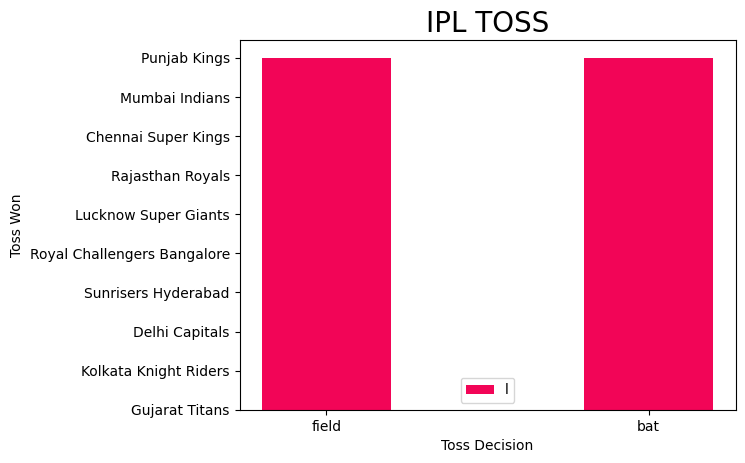

<Figure size 1500x2400 with 0 Axes>

In [83]:
plt.bar(ipl_match["toss_decision"],ipl_match["toss_won"],color="#F20557",width=0.4)#giving arguments for bar plot to visualize the data
plt.title("IPL TOSS",fontdict={'fontname':"Comic Sans Ms","fontsize":20})#giving the paramters of title and font dict
plt.ylabel("Toss Won")#note label naming of x_Axis
plt.xlabel("Toss Decision") #note label naming of y_Axis
plt.legend("labels") #it shows the label in graph
plt.figure(figsize=(5,8),dpi=300) #giving figure measuremnets
plt.show()

# 4.plot the line plot showing the match location for every match in ipl 2023?

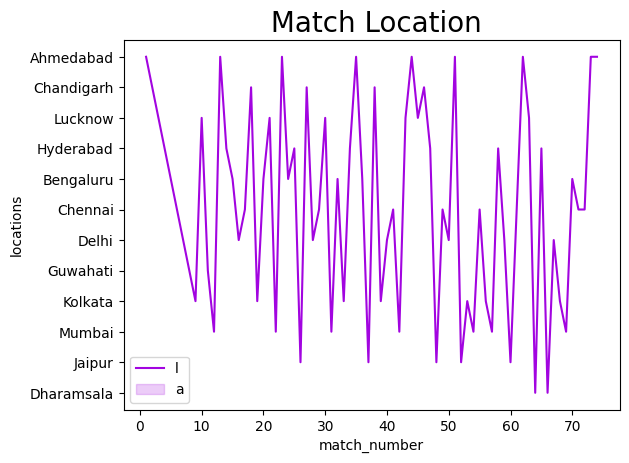

<Figure size 1500x2400 with 0 Axes>

In [84]:
sns.lineplot(x=ipl_match["match_number"],y=ipl_match["location"],data=ipl_match,color="#A204E0")#giveing arugments for lineplot
plt.title(" Match Location",fontdict={"fontsize":20})  #labelling the tittle and font
plt.ylabel("locations")#note label naming of x_Axis
plt.xlabel("match_number")#note label naming of y_Axis
plt.legend("labels")
plt.figure(figsize=(5,8),dpi=300)  #giving figure measurments
plt.savefig("lineplot",dpi=300) #command to save figure
plt.show()  #it stops displaying the plotname etc..

* from above graph we can say that the match locations:
1. lowest matches held in "Dharmsala"
2. highest matches held in "ahemadabad"

# 5.How many matches won by each team in ipl 2023?

In [85]:
ipl_match.groupby(['winner','match_number']).count().droplevel(level=1).index.value_counts()

winner
Gujarat Titans                 11
Chennai Super Kings            10
Mumbai Indians                  9
Lucknow Super Giants            8
Rajasthan Royals                7
Royal Challengers Bangalore     7
Kolkata Knight Riders           6
Punjab Kings                    6
Delhi Capitals                  5
Sunrisers Hyderabad             4
No Result                       1
Name: count, dtype: int64

# 6.show the match  every details of ipl 2023 final match ?

In [86]:
ipl_match.query('match_type =="Final" and winner =="Chennai Super Kings"') #used query method to find the data in dataset

,match_type,venue,season,date,match_number,location,team1,team2,toss_won,toss_decision,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,man_of_match
73,Final,Narendra Modi Stadium,2023,29-05-2023,74,Ahmedabad,Chennai Super Kings,Gujarat Titans,Chennai Super Kings,field,Nitin Menon,RJ Tucker,J Madanagopal,J Srinath,Chennai Super Kings,0,5,DP Conway


# 7.plot the jointplot for every match wickets and runs of winner games ?

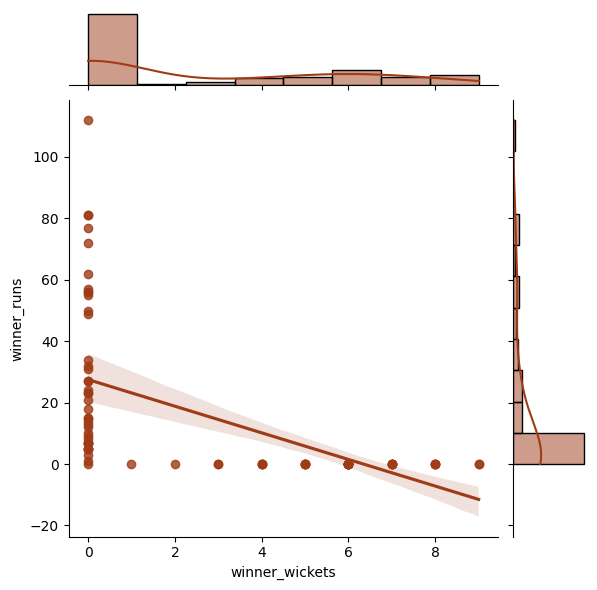

In [87]:
sns.jointplot(data=ipl_match,y="winner_runs",x="winner_wickets" ,kind="reg",color="#9F3B16")
#here the plotting occurs between bivaraints
#reg plot is m0odel fit plot shows the reultant regression true line between data
plt.show()

# 8.get the list of players who get  man_of match in ipl 2023?

In [88]:
man_of_match=ipl_match['man_of_match'].value_counts()
man_of_match

man_of_match
Shubman Gill       4
YBK Jaiswal        4
MP Stoinis         3
DP Conway          3
RA Jadeja          3
N Pooran           2
RD Gaikwad         2
SA Yadav           2
CV Varun           2
C Green            2
V Kohli            2
MM Sharma          2
Rashid Khan        2
F du Plessis       2
RK Singh           2
S Dhawan           1
GD Phillips        1
J Little           1
MR Marsh           1
Mohammed Shami     1
Ishan Kishan       1
M Pathirana        1
PD Salt            1
AD Russell         1
JC Buttler         1
PN Mankad          1
P Simran Singh     1
WD Parnell         1
RR Rossouw         1
D Padikkal         1
MA Wood            1
MM Ali             1
A Manohar          1
AR Patel           1
AM Rahane          1
RG Sharma          1
R Ashwin           1
KH Pandya          1
HC Brook           1
SN Thakur          1
Sikandar Raza      1
VR Iyer            1
SO Hetmyer         1
NT Ellis           1
B Sai Sudharsan    1
Arshdeep Singh     1
Mohammed Siraj     1


#  9.plot the graph to know if there is any outlier in score for every ball in ipl 2023 match?

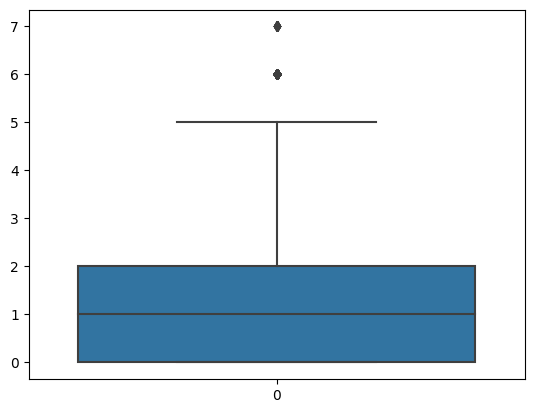

In [89]:
sns.boxplot(ipl_ball["score"])
plt.show()

In [90]:
venue=ipl_match['venue'].value_counts()
venue

venue
Narendra Modi Stadium                                           9
MA Chidambaram Stadium                                          9
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium    7
Rajiv Gandhi International Stadium                              7
M Chinnaswamy Stadium                                           7
Arun Jaitley Stadium                                            7
Eden Gardens                                                    7
Wankhede Stadium                                                7
Punjab Cricket Association IS Bindra Stadium                    5
Sawai Mansingh Stadium                                          5
Barsapara Cricket Stadium                                       2
Himachal Pradesh Cricket Association Stadium                    2
Name: count, dtype: int64

# 10.plot the pie chart showing how many matchs held in same stadium?

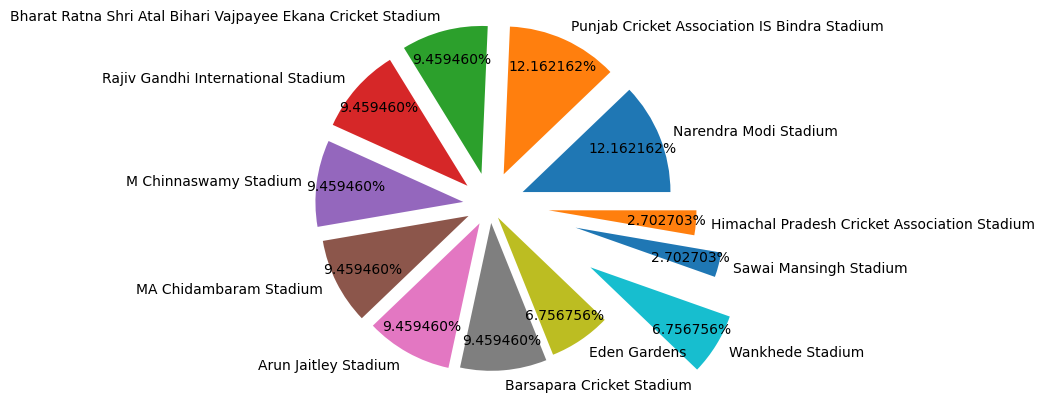

In [91]:
separte=(0.24,0.23,0.22,0.20,.18,.16,.14,.12,.10,.8,.6,.4)
labels=['Narendra Modi Stadium','Punjab Cricket Association IS Bindra Stadium','Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium','Rajiv Gandhi International Stadium', 'M Chinnaswamy Stadium','MA Chidambaram Stadium', 'Arun Jaitley Stadium','Barsapara Cricket Stadium', 'Eden Gardens', 'Wankhede Stadium','Sawai Mansingh Stadium','Himachal Pradesh Cricket Association Stadium']
plt.pie(venue,labels=labels,autopct="%1f%%",pctdistance=0.8,explode=separte)
plt.show()

#  11.find the score and overs played by players in different innings of ipl 2023?

**list of matches which played innings 1 in ipl 2023**

In [92]:
inning1=ipl_ball.query('inningno == 1') #used query method to find the data in dataset
inning1

,match_no,ballnumber,inningno,over,outcome,batter,bowler,score
0,1,1,1,0.1,0,Devon Conway,Mohammed Shami,0
1,1,2,1,0.2,1lb,Devon Conway,Mohammed Shami,1
2,1,3,1,0.3,0,Ruturaj Gaikwad,Mohammed Shami,0
3,1,4,1,0.4,1,Ruturaj Gaikwad,Mohammed Shami,1
4,1,5,1,0.5,0,Devon Conway,Mohammed Shami,0
...,...,...,...,...,...,...,...,...
17759,74,113,1,19.2,6,Sai Sudharsan,Matheesha Pathirana,6
17760,74,114,1,19.3,w,Sai Sudharsan,Matheesha Pathirana,0
17761,74,115,1,19.4,1b,Rashid Khan,Matheesha Pathirana,1
17762,74,116,1,19.5,1lb,Hardik Pandya,Matheesha Pathirana,1


# score board of innings1

In [93]:
score1=inning1.groupby(['batter','outcome'])['outcome'].count()
score1.to_csv('score.csv')
score1=pd.read_csv('score.csv')
score1=pd.pivot_table(score1,values=None,index=['batter'],columns=['outcome'],fill_value=0,aggfunc=np.sum)
score1

outcome.1                                    ...              \
outcome                 0   1 1b 1lb 1nb 1wd  2 2lb 2nb 2wd  ... 3nb 3wd   4   
batter                                                       ...               
Abdul Samad            20  19  0   1   0   0  3   0   0   0  ...   0   0   3   
Abhinav Manohar         8  20  0   0   0   0  3   0   0   0  ...   0   0   6   
Abhishek Sharma        30  32  0   0   0   6  5   0   1   0  ...   0   0  21   
Abishek Porel           2   7  0   0   0   0  1   0   0   0  ...   0   0   0   
Adam Zampa              2   6  0   0   0   1  0   0   0   0  ...   0   0   0   
...                   ...  .. ..  ..  ..  .. ..  ..  ..  ..  ...  ..  ..  ..   
Yudhvir Singh           0   0  0   0   0   0  0   0   0   0  ...   0   0   0   
inis                    5  13  0   0   0   0  4   0   0   0  ...   0   0   3   
n Sundar               25  25  0   0   0   0  6   0   0   0  ...   0   0   8   
ne                      0   8  0   0   0   0  1   0   0   0  ...   0   0   7   
rius                    8  12  1   0   0   4  0   0   0   0  ...   0   0   3   

                                          
outcome         4b 4lb 5nb 5wd  6 7nb  w  
batter                                    
Abdul Samad      0   0   0   0  8   0  2  
Abhinav Manohar  0   0   0   0  6   0  4  
Abhishek Sharma  0   0   0   0  4   0  5  
Abishek Porel    0   0   0   0  2   0  2  
Adam Zampa       0   0   0   0  0   0  2  
...             ..  ..  ..  .. ..  .. ..  
Yudhvir Singh    0   0   0   0  0   0  2  
inis             0   0   0   0  3   0  2  
n Sundar         0   0   0   0  5   0  3  
ne               0   0   0   0  1   0  1  
rius             0   0   0   0  0   0  0  

[155 rows x 21 columns]

** list of matches which played second innings in ipl 2023**

In [94]:
inning2=ipl_ball.query('inningno == 2') #used query method to find the data in dataset
inning2

,match_no,ballnumber,inningno,over,outcome,batter,bowler,score
121,1,1,2,0.1,0,Wriddhiman Saha,Deepak Chahar,0
122,1,2,2,0.2,0,Wriddhiman Saha,Deepak Chahar,0
123,1,3,2,0.3,0,Wriddhiman Saha,Deepak Chahar,0
124,1,4,2,0.4,1,Wriddhiman Saha,Deepak Chahar,1
125,1,5,2,0.5,2,Shubman Gill,Deepak Chahar,2
...,...,...,...,...,...,...,...,...
17858,74,95,2,0.1,0,Wriddhiman Saha,Deepak Chahar,0
17859,74,96,2,0.2,0,Wriddhiman Saha,Deepak Chahar,0
17860,74,97,2,0.3,1,Wriddhiman Saha,Deepak Chahar,1
17861,74,98,2,0.4,1,Shubman Gill,Deepak Chahar,1


# score board of innings2

In [95]:
score2=inning2.groupby(['batter','outcome'])['outcome'].count()
score2.to_csv('score.csv')
score2=pd.read_csv('score.csv')
score2=pd.pivot_table(score2,values=None,index=['batter'],columns=['outcome'],fill_value=0,aggfunc=np.sum)
score2

outcome.1                                   ...             \
outcome                  0   1 1b 1lb 1nb 1wd  2 2b 2lb 2nb  ... 3wd   4 4b   
batter                                                       ...              
Abdul Basith             0   1  0   0   0   0  0  0   0   0  ...   0   0  0   
Abdul Samad             24  25  0   3   1   2  5  0   0   1  ...   0   6  0   
Abhinav Manohar         11  22  0   0   0   2  0  0   0   0  ...   0   0  0   
Abhishek Sharma         12  25  0   2   0   3  5  0   0   0  ...   0   7  0   
Abishek Porel            5   8  0   1   0   0  0  0   0   0  ...   0   1  0   
...                    ...  .. ..  ..  ..  .. .. ..  ..  ..  ...  ..  .. ..   
Yashasvi Jaiswal        57  56  1   2   0   7  3  0   0   0  ...   0  31  0   
inis                    12  11  0   1   0   4  1  0   0   0  ...   0   5  0   
kes                      0   2  0   0   0   0  1  0   0   0  ...   0   2  0   
n Sundar                 7  19  0   0   0   0  3  0   0   0  ...   0   4  0   
ne                       3  10  0   0   0   0  1  0   0   0  ...   0   8  0   

                                           
outcome          4lb  5 5nb 5wd  6 7nb  w  
batter                                     
Abdul Basith       0  0   0   0  0   0  0  
Abdul Samad        0  0   1   0  3   0  3  
Abhinav Manohar    0  0   0   0  1   0  2  
Abhishek Sharma    0  0   0   0  2   0  6  
Abishek Porel      0  0   0   0  0   0  2  
...               .. ..  ..  .. ..  .. ..  
Yashasvi Jaiswal   0  0   0   0  9   0  5  
inis               0  0   0   0  2   0  3  
kes                0  0   0   0  1   0  0  
n Sundar           0  0   0   0  1   0  0  
ne                 0  0   0   0  1   0  1  

[158 rows x 23 columns]

In [96]:
inning1=inning1.drop('inningno',axis=1)
inning2=inning2.drop('inningno',axis=1)

In [97]:
top_inning1=inning1.head(100) #top 100 bowlers in innings1

In [98]:
top_inning2=inning2.head(100) #top 100 bowlers in innings2

# Count of over each batter played in inning 1

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Devon Conway'),
  Text(1, 0, 'Ruturaj Gaikwad'),
  Text(2, 0, 'Moeen Ali'),
  Text(3, 0, 'Ben S'),
  Text(4, 0, 'Ambati Rayudu'),
  Text(5, 0, 'Shivam Dube')])

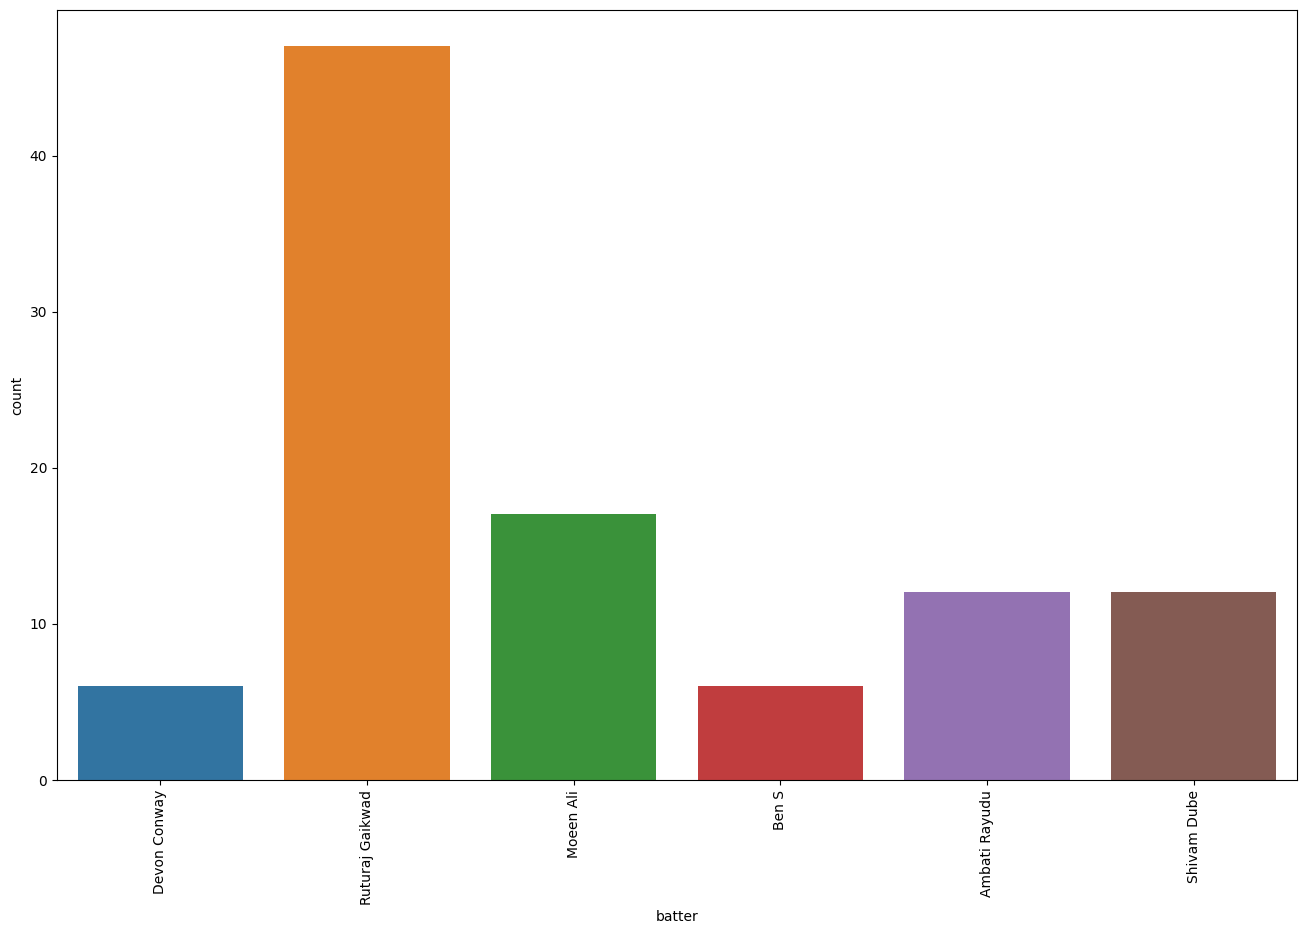

In [99]:
plt.figure(figsize = (16,10))
sns.countplot(x=top_inning1['batter'])
plt.xticks(rotation=90)

# # Count of over each batter played in inning 2

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Wriddhiman Saha'),
  Text(1, 0, 'Shubman Gill'),
  Text(2, 0, 'Sai Sudharsan'),
  Text(3, 0, 'Hardik Pandya'),
  Text(4, 0, 'Vijay Shankar'),
  Text(5, 0, 'Rahul Tewatia')])

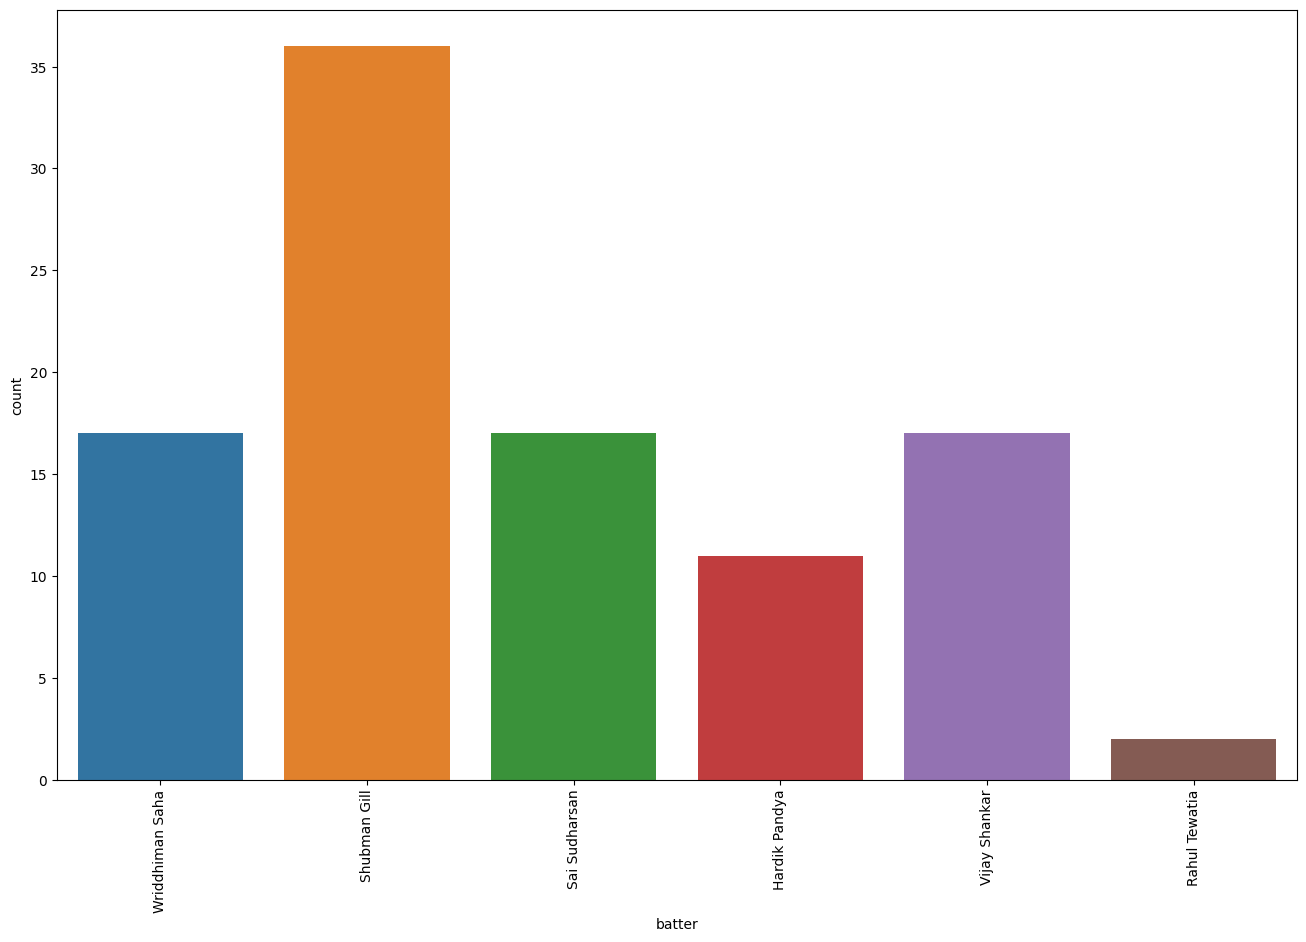

In [100]:
plt.figure(figsize = (16,10))
sns.countplot(x=top_inning2['batter'])
plt.xticks(rotation=90)

#  Count of over each bowler played in inning 1

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mohammed Shami'),
  Text(1, 0, 'Hardik Pandya'),
  Text(2, 0, 'Josh Little'),
  Text(3, 0, 'Rashid Khan'),
  Text(4, 0, 'Alzarri Joseph'),
  Text(5, 0, 'Yash Dayal')])

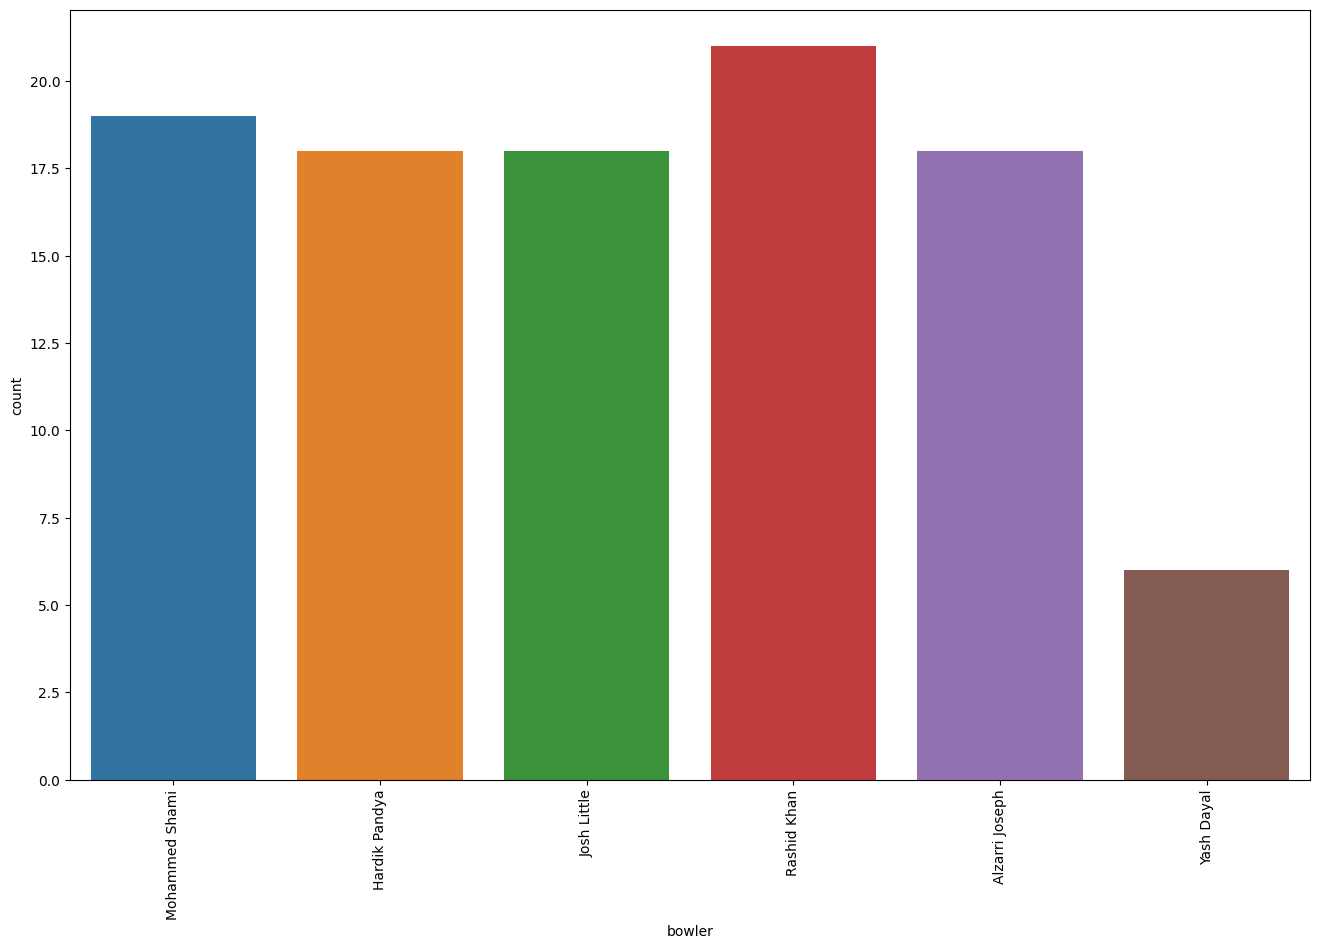

In [101]:
plt.figure(figsize = (16,10))
sns.countplot(x=top_inning1['bowler'])
plt.xticks(rotation=90)

#  Count of over each bowler played in inning 2

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Deepak Chahar'),
  Text(1, 0, 'Tushar Deshpande'),
  Text(2, 0, 'Rajvardhan Hangargekar'),
  Text(3, 0, 'Mitchell Santner'),
  Text(4, 0, 'Ravindra Jadeja')])

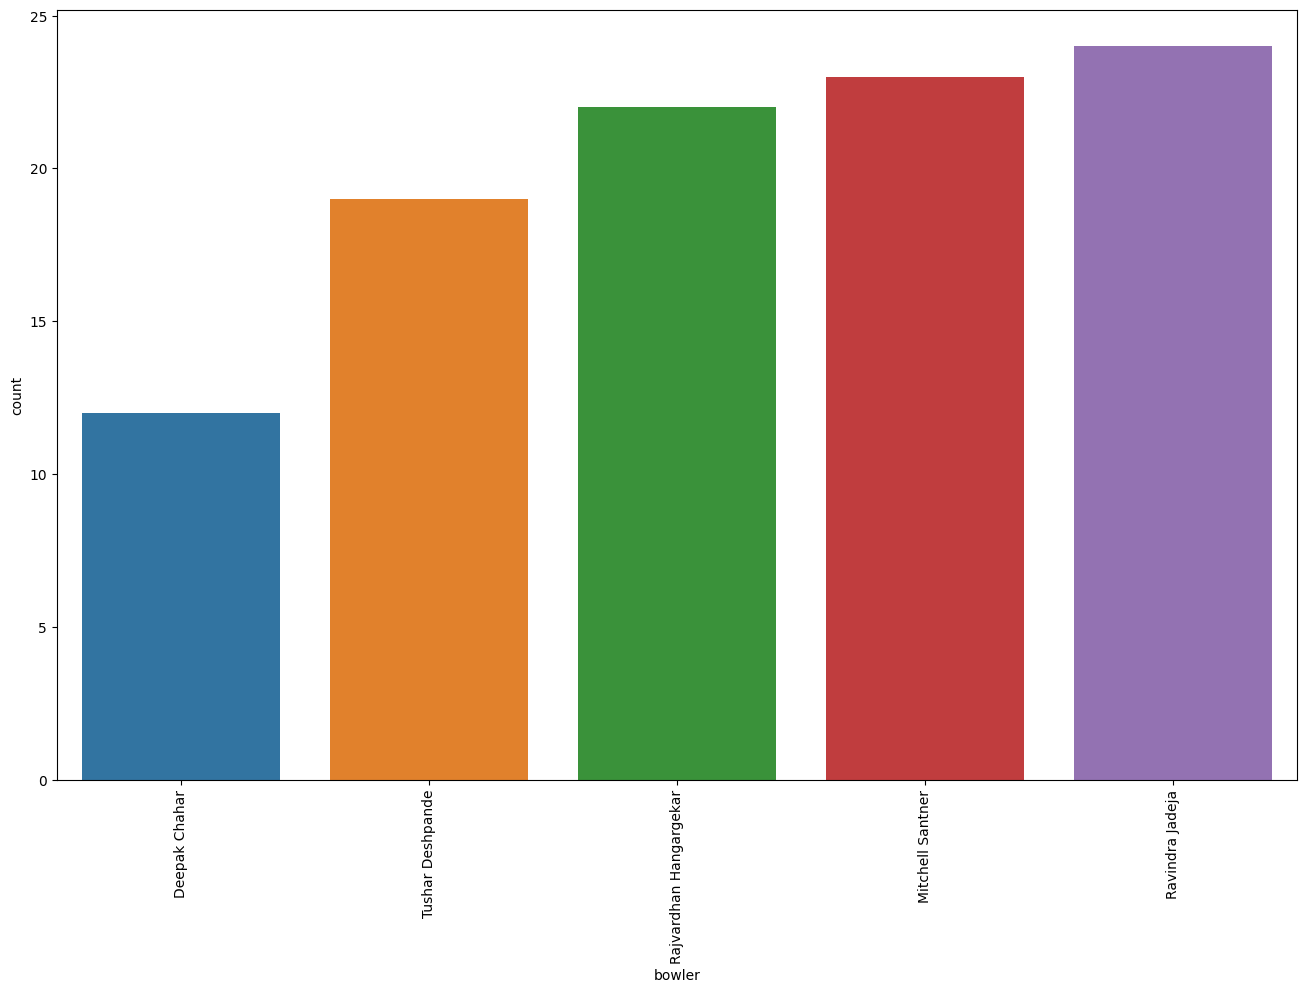

In [102]:
plt.figure(figsize = (16,10))
sns.countplot(x=top_inning2['bowler'])
plt.xticks(rotation=90)

# Players scored six in inning 1 (batter and bowler)

In [103]:
six1=inning1[inning1["outcome"]=="6"]
six1

,match_no,ballnumber,over,outcome,batter,bowler,score
18,1,19,3.1,6,Ruturaj Gaikwad,Josh Little,6
28,1,29,4.4,6,Moeen Ali,Mohammed Shami,6
39,1,40,6.3,6,Ruturaj Gaikwad,Hardik Pandya,6
40,1,41,6.4,6,Ruturaj Gaikwad,Hardik Pandya,6
49,1,50,8.1,6,Ruturaj Gaikwad,Alzarri Joseph,6
...,...,...,...,...,...,...,...
17740,74,94,16.1,6,Sai Sudharsan,Tushar Deshpande,6
17752,74,106,18.1,6,Hardik Pandya,Tushar Deshpande,6
17757,74,111,18.6,6,Hardik Pandya,Tushar Deshpande,6
17758,74,112,19.1,6,Sai Sudharsan,Matheesha Pathirana,6


In [104]:
six1['batter'].value_counts()

batter
Ruturaj Gaikwad    25
Shivam Dube        25
Glenn Maxwell      21
Faf du Plessis     20
Shubman Gill       19
                   ..
Ripal Patel         1
Jason Holder        1
Akeal Hosein        1
ne                  1
Sarfaraz Khan       1
Name: count, Length: 92, dtype: int64

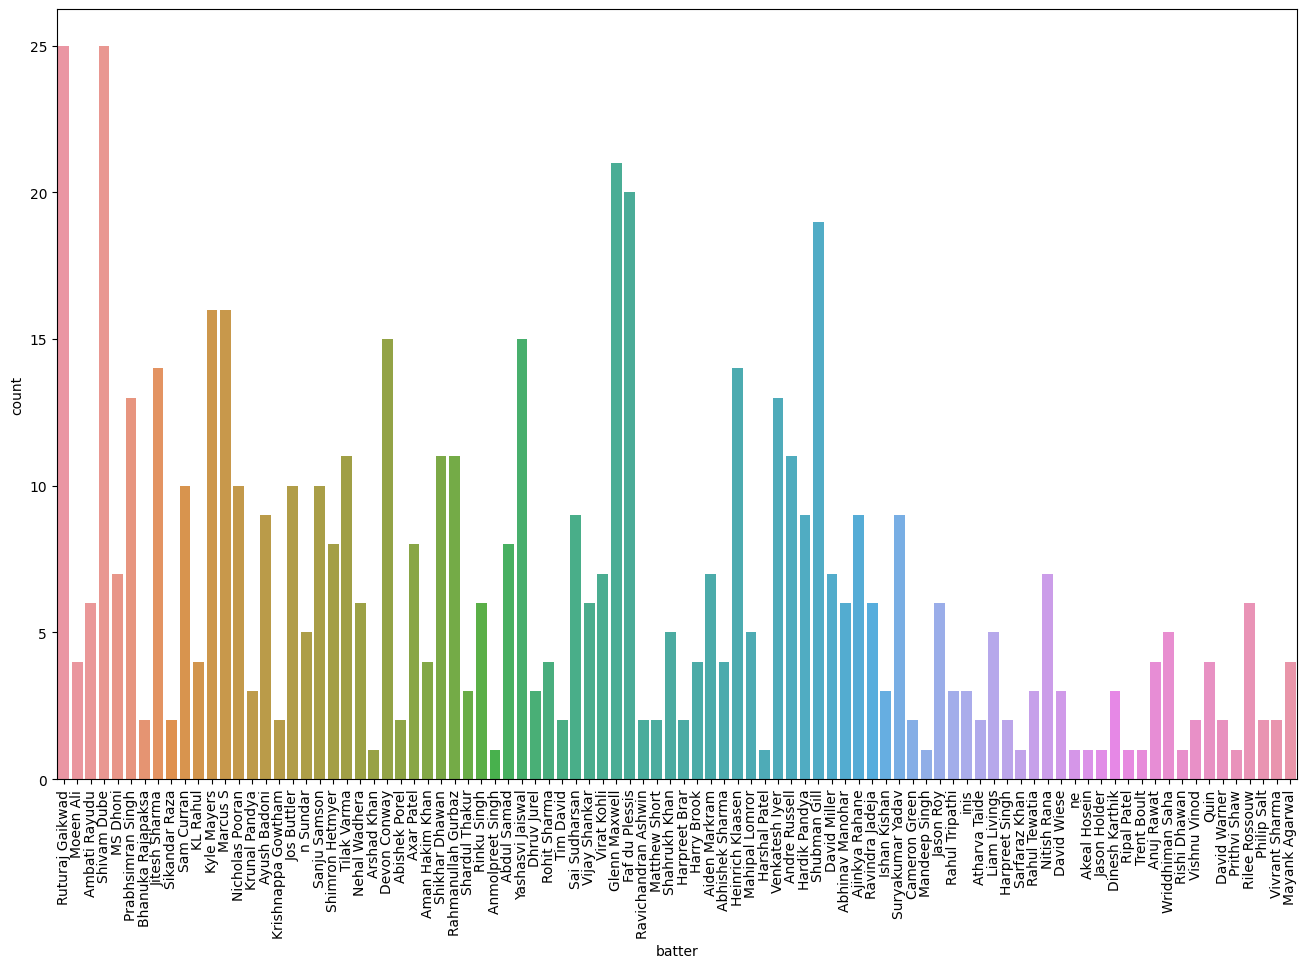

In [105]:
plt.figure(figsize = (16,10))
sns.countplot(x=six1['batter'])
plt.xticks(rotation=90)
plt.show()

In [106]:
six1['bowler'].value_counts()

bowler
Kuldeep Yadav         15
Cameron Green         14
Axar Patel            14
Jason Behrendorff     13
Varun Chakravarthy    13
                      ..
Ishant Sharma          1
Praveen Dubey          1
Arshdeep Singh         1
Navdeep Saini          1
Vaibhav Arora          1
Name: count, Length: 103, dtype: int64

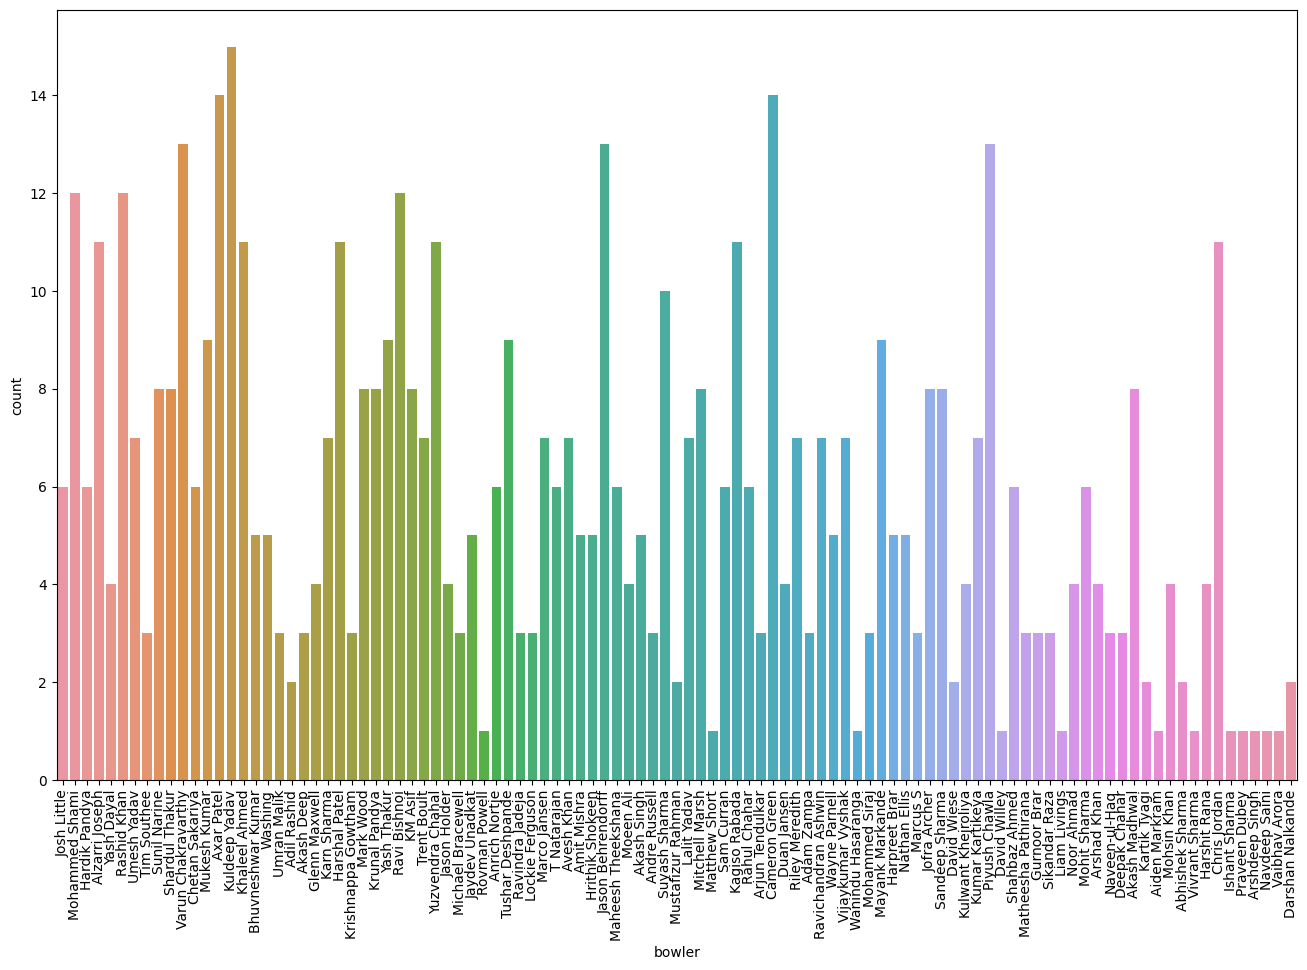

In [107]:
plt.figure(figsize = (16,10))
sns.countplot(x=six1['bowler'])
plt.xticks(rotation=90)
plt.show()

# Players scored six in inning 2 (batter and bowler)

In [108]:
six2=inning2[inning2["outcome"]=="6"]
six2

,match_no,ballnumber,over,outcome,batter,bowler,score
127,1,7,1.1,6,Wriddhiman Saha,Tushar Deshpande,6
137,1,17,2.5,6,Wriddhiman Saha,Deepak Chahar,6
150,1,30,4.3,6,Shubman Gill,Tushar Deshpande,6
189,1,69,10.6,6,Shubman Gill,Ravindra Jadeja,6
214,1,94,14.5,6,Shubman Gill,Tushar Deshpande,6
...,...,...,...,...,...,...,...
17838,74,75,11.5,6,Shivam Dube,Rashid Khan,6
17839,74,76,11.6,6,Shivam Dube,Rashid Khan,6
17840,74,77,12.1,6,Ambati Rayudu,Mohit Sharma,6
17842,74,79,12.3,6,Ambati Rayudu,Mohit Sharma,6


In [109]:
six2['batter'].value_counts()

batter
Rinku Singh            21
Suryakumar Yadav       18
Cameron Green          18
Faf du Plessis         16
Nicholas Pooran        16
                       ..
Shahbaz Ahmed           1
Ravichandran Ashwin     1
Narayan Jagadeesan      1
n Sundar                1
Dasun Shanaka           1
Name: count, Length: 97, dtype: int64

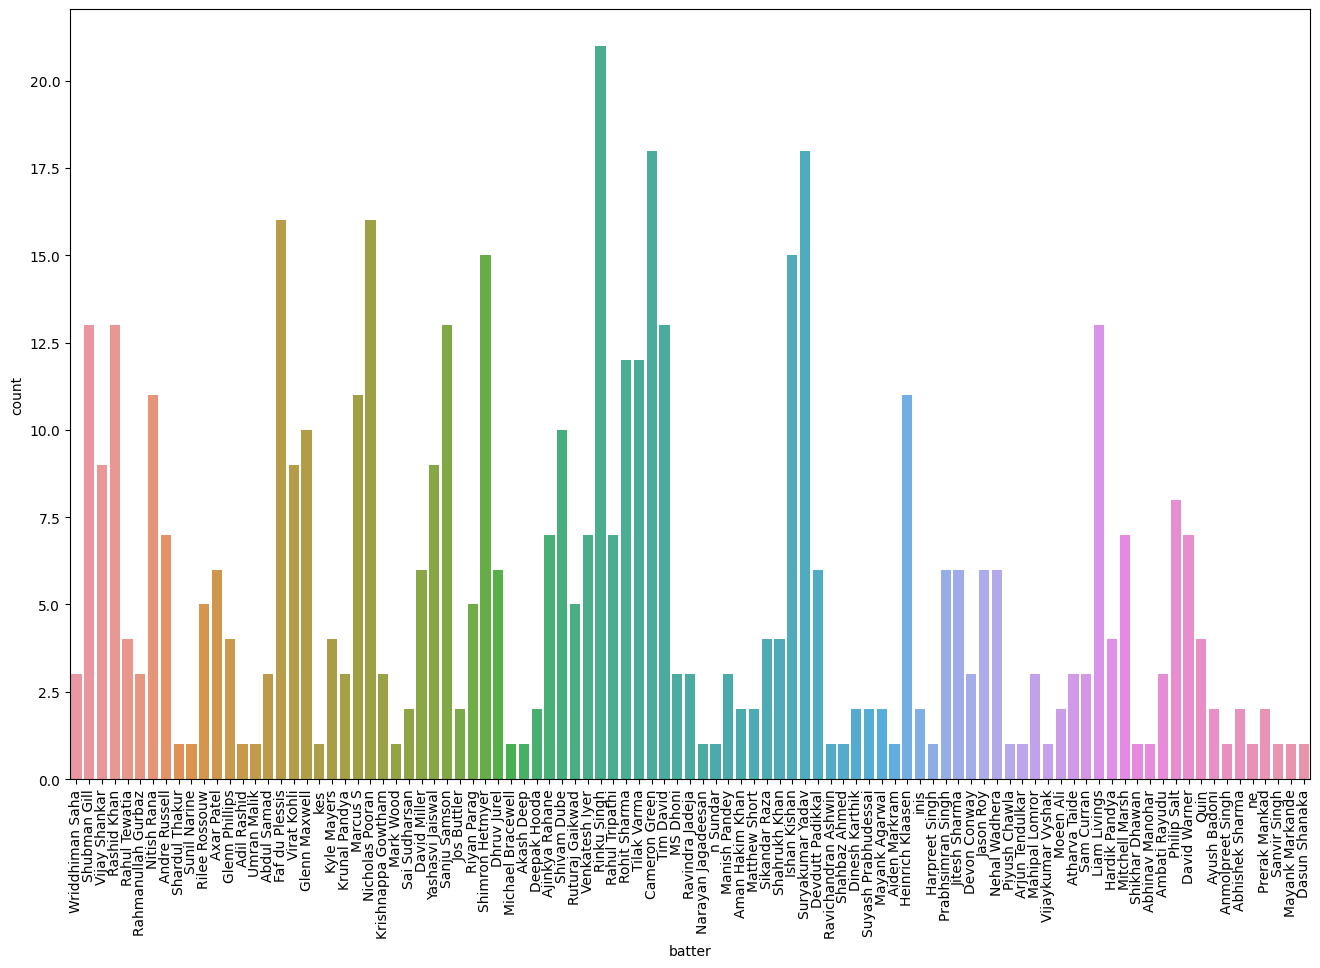

In [110]:
plt.figure(figsize = (16,10))
sns.countplot(x=six2['batter'])
plt.xticks(rotation=90)
plt.show()

In [111]:
six2['bowler'].value_counts()

bowler
Tushar Deshpande    19
Ravindra Jadeja     17
Sam Curran          15
Arshdeep Singh      15
Rashid Khan         14
                    ..
Mitchell Santner     1
Ben S                1
Navdeep Saini        1
Trent Boult          1
Himanshu Sharma      1
Name: count, Length: 107, dtype: int64

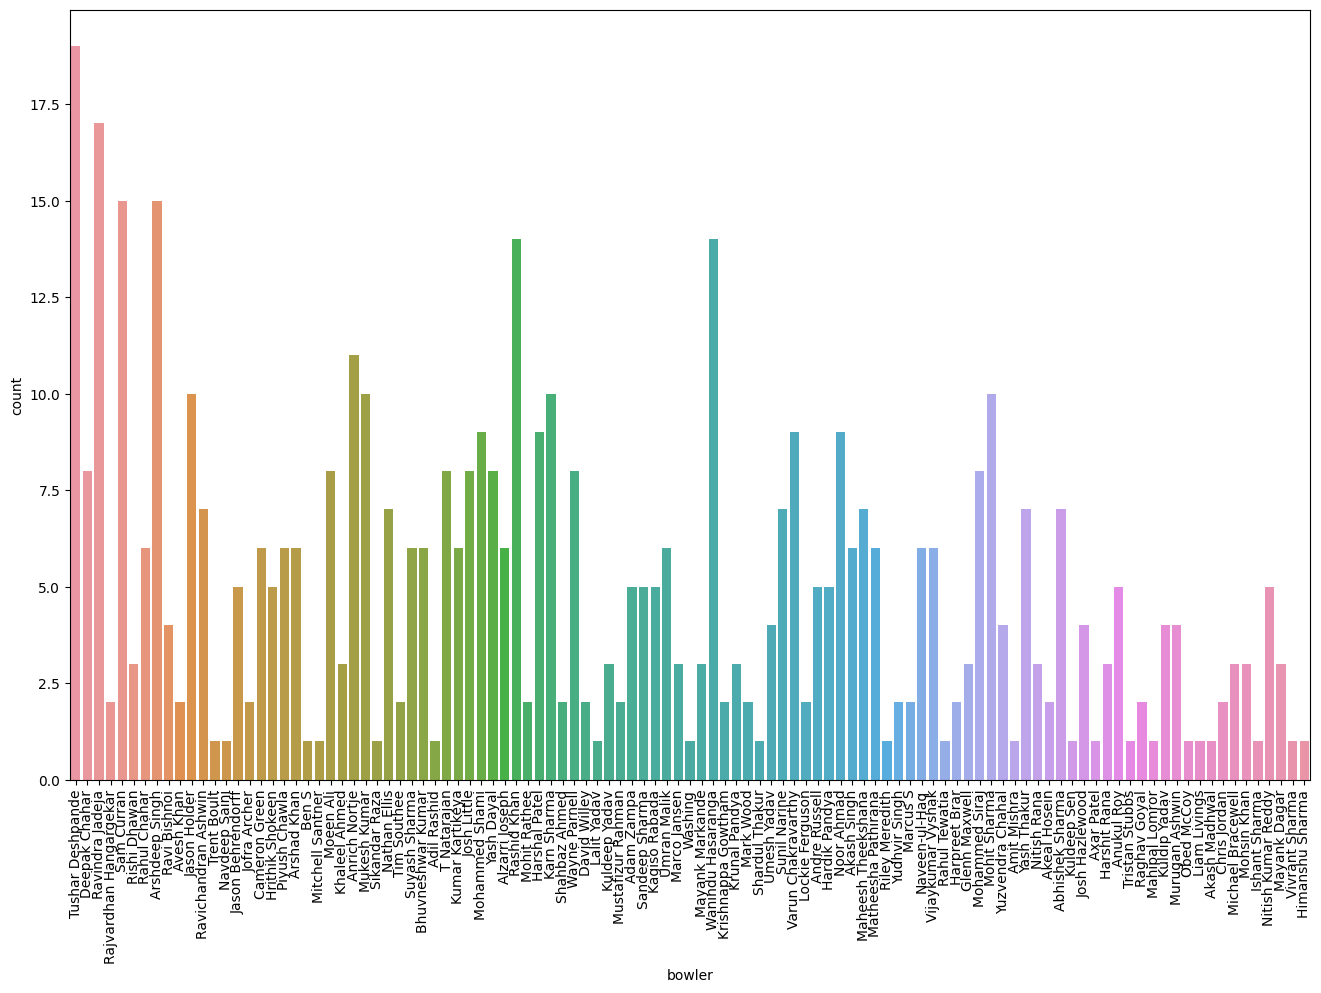

In [112]:
plt.figure(figsize = (16,10))
sns.countplot(x=six2['bowler'])
plt.xticks(rotation=90)
plt.show()

# SUMMARY:

# IPL Data Analysis and Visualization with Python. 
**General Analysis of IPL Matches** 
1. List of Seasons. 
2. First ball of IPL history. 
3. Season Wise IPL Matches. 
4. Most IPL Matches played in a Venue.
5. IPL Matches Played by Each Team.
**IPL Batting Analysis.**
1. Most Run Scored by IPL Teams. 
2. Most IPL Runs by a Batsman.etcc 
3. To analyze player performance and develop strategies to enhance it 
4. use for Player Valuation and Auctions
5. Data analytics isn’t limited to team selection alone. It extends to optimizing both team and individual performance.
6. these are done in this EDA project 